# TU256 - Machine Learning Final Assignment

Task Description: In this assignment we will develop a classifier that uses data to predict the outcome of a bank marketing campaign.

There are 2 files available:
1. trainingset.txt - this file contains the training instances. It contains the descriptive features and the target feature level for each instance. You should split this dataset into training and test.
2. queries.txt - this file contains the query instances. It contains the descriptive features for each instance. However, the target feature level has been overwritten with ‘?’.

### Project Overview: Steps and Workflow

In this notebook, we will walk through the machine learning pipeline to predict the target variable. The process will consist of the following steps:

- Data Exploration: We will start by exploring the dataset to understand its structure, check for missing or inconsistent values, and identify any outliers or duplicates. This helps in assessing data quality and deciding how to handle these issues.

- Data Preprocessing: After exploring the data, we will clean and prepare it for modeling. This includes handling missing values, addressing outliers, and selecting the relevant features to keep.

- Feature Engineering: We will perform feature selection, encode categorical variables, scale numerical features and handling imbalanced data. This step ensures the data is ready for machine learning models.

- Model Training and Evaluation: We will train four different machine learning models (KNN, Random Forest, Naïve Bayes, and SVM), evaluate their performance, and choose the best model based on the evaluation metrics.

- Prediction: Once the best model is selected, we will make predictions on the query data and discuss the next steps.

https://www.kaggle.com/code/hariharanpavan/bank-marketing-analysis

| Header     | Data Type | Definition |
|------------|----------|------------|
| Age        | int64    | Age of customer |
| Job        | object   | Job of customer |
| Marital    | object   | Marital status of customer |
| Education  | object   | Customer education level |
| Default    | object   | Has credit in default? |
| Housing    | object   | If customer has housing loan |
| Loan       | object   | Has Personal Loan |
| Balance    | int64    | Customer's individual balance |
| Contact    | object   | Communication type |
| Month      | object   | Last contact month of year |
| Day        | int64    | Last contact day of the week |
| Duration   | int64    | Last contact duration, in seconds |
| Campaign   | int64    | Number of contacts performed during this campaign and for this client |
| Pdays      | int64    | Number of days that passed by after the client was last contacted from a previous campaign |
| Previous   | int64    | Number of contacts performed before this campaign and for this client |
| Poutcome   | object   | Outcome of the previous marketing campaign |
| Y          | object   | Has the client subscribed to a term deposit? |


## 1. Importing Libraries

In [7]:
# Essential Libraries  
import pandas as pd  
import numpy as np  
import warnings  
warnings.filterwarnings("ignore")  

# Data Visualization 
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline  

# Statistical Analysis & Feature Engineering
from scipy.stats import zscore  
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Data Preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

# ------------------------------------  
# Machine Learning Models  

## Similarity-Based Model: K-Nearest Neighbors (KNN) 
from sklearn.neighbors import KNeighborsClassifier  

## Information-Based Model: Random Forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  # Random Forest  
#import xgboost as xgb  # XGBoost
from xgboost import XGBClassifier
#from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Machine (GBM)  
#import lightgbm as lgb  # LightGBM  
#import catboost as cb  # CatBoost  

## Probability-Based Model: Naïve Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB

## Error-Based Models
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.svm import SVC  # Support Vector Classifier 

#from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron (MLP)  
#import tensorflow as tf  # TensorFlow for Deep Learning (CNN, RNN, Transformers)  
#import torch  # PyTorch for Deep Learning  
# ------------------------------------  

# Evaluation Metrics
from sklearn import metrics  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from scipy.stats import uniform

# Other Utilities
from IPython.display import Image 
import time

## 2. Data Exploration

First, we load the dataset and check the general structure, including data types, missing values, and first few rows.

### 2.1 Load the Datasets and Inspect Basic Information

In [10]:
# Load training data
train_df = pd.read_csv("trainingset.txt")

# Load query data
query_df = pd.read_csv("queries.txt")

# Display the first few rows of both datasets
print("Training Set:")
print(train_df.head())

print("\nQueries Set:")
print(query_df.head())

Training Set:
   age      job   marital  education default  balance housing loan  contact  \
0   44  JobCat9    single  secondary      no       29     yes   no  unknown   
1   47  JobCat3   married    unknown      no     1506     yes   no  unknown   
2   31  unknown    single    unknown      no        1      no   no  unknown   
3   26  JobCat6    single   tertiary      no      447     yes  yes  unknown   
4   42  JobCat4  divorced   tertiary     yes        2     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome      y  
0    5   may         0         1     -1         0  unknown  TypeA  
1    5   may         0         1     -1         0  unknown  TypeA  
2    5   may         0         1     -1         0  unknown  TypeA  
3    5   may         0         1     -1         0  unknown  TypeA  
4    5   may         0         1     -1         0  unknown  TypeA  

Queries Set:
   age       job  marital  education default  balance housing loan  contact  \
0   58   J

In [11]:
# Display basic information about the training dataset
print("Training Data Info:")
print(train_df.info())

# Display basic information about the query dataset
print("\nQuery Data Info:")
print(query_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27272 non-null  int64 
 1   job        27272 non-null  object
 2   marital    27272 non-null  object
 3   education  27272 non-null  object
 4   default    27272 non-null  object
 5   balance    27272 non-null  int64 
 6   housing    27272 non-null  object
 7   loan       27272 non-null  object
 8   contact    27272 non-null  object
 9   day        27272 non-null  int64 
 10  month      27272 non-null  object
 11  duration   27272 non-null  int64 
 12  campaign   27272 non-null  int64 
 13  pdays      27272 non-null  int64 
 14  previous   27272 non-null  int64 
 15  poutcome   27272 non-null  object
 16  y          27272 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.5+ MB
None

Query Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17939 

##### Overview of the Datasets

Training Data: The training dataset contains various features like age, job, marital status, education, balance, and others. There are no missing values in the dataset, but some categorical features contain "unknown" values. We also identified a few duplicate rows in the training data.

Query Data: The query dataset has similar features to the training data, but the target variable ("y") is missing, as it is the data we need to predict. It also contains a few duplicate rows. The dataset will be filled with predictions after model training.

### 2.2 Checking for Missing Values

In [14]:
# Count missing values in training data
print("\nMissing values in training data:")
print(train_df.isnull().sum())

# Count missing values in query data
print("\nMissing values in query data:")
print(query_df.isnull().sum())


Missing values in training data:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing values in query data:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
 campaign    0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Observations on Missing Values  
- No missing values were found in either the training or query datasets.  
- This simplifies preprocessing since we do not need to impute or drop any rows.  
- However, we still need to check for inconsistencies and outliers, especially in categorical values and numerical distributions.  

### 2.3 Exploring Categorical Features

Inspecting the unique values of categorical features to detect inconsistencies.

In [17]:
# List categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Check unique values in categorical columns
#for col in categorical_cols:
#    print(f"\nUnique values in {col}:")
#    print(train_df[col].unique())

# Count occurrences of each category in categorical columns
#for col in categorical_cols:
#    print(f"\nValue counts for {col}:")
#    print(train_df[col].value_counts())

##### Bar plots to analyze the distribution of categorical features

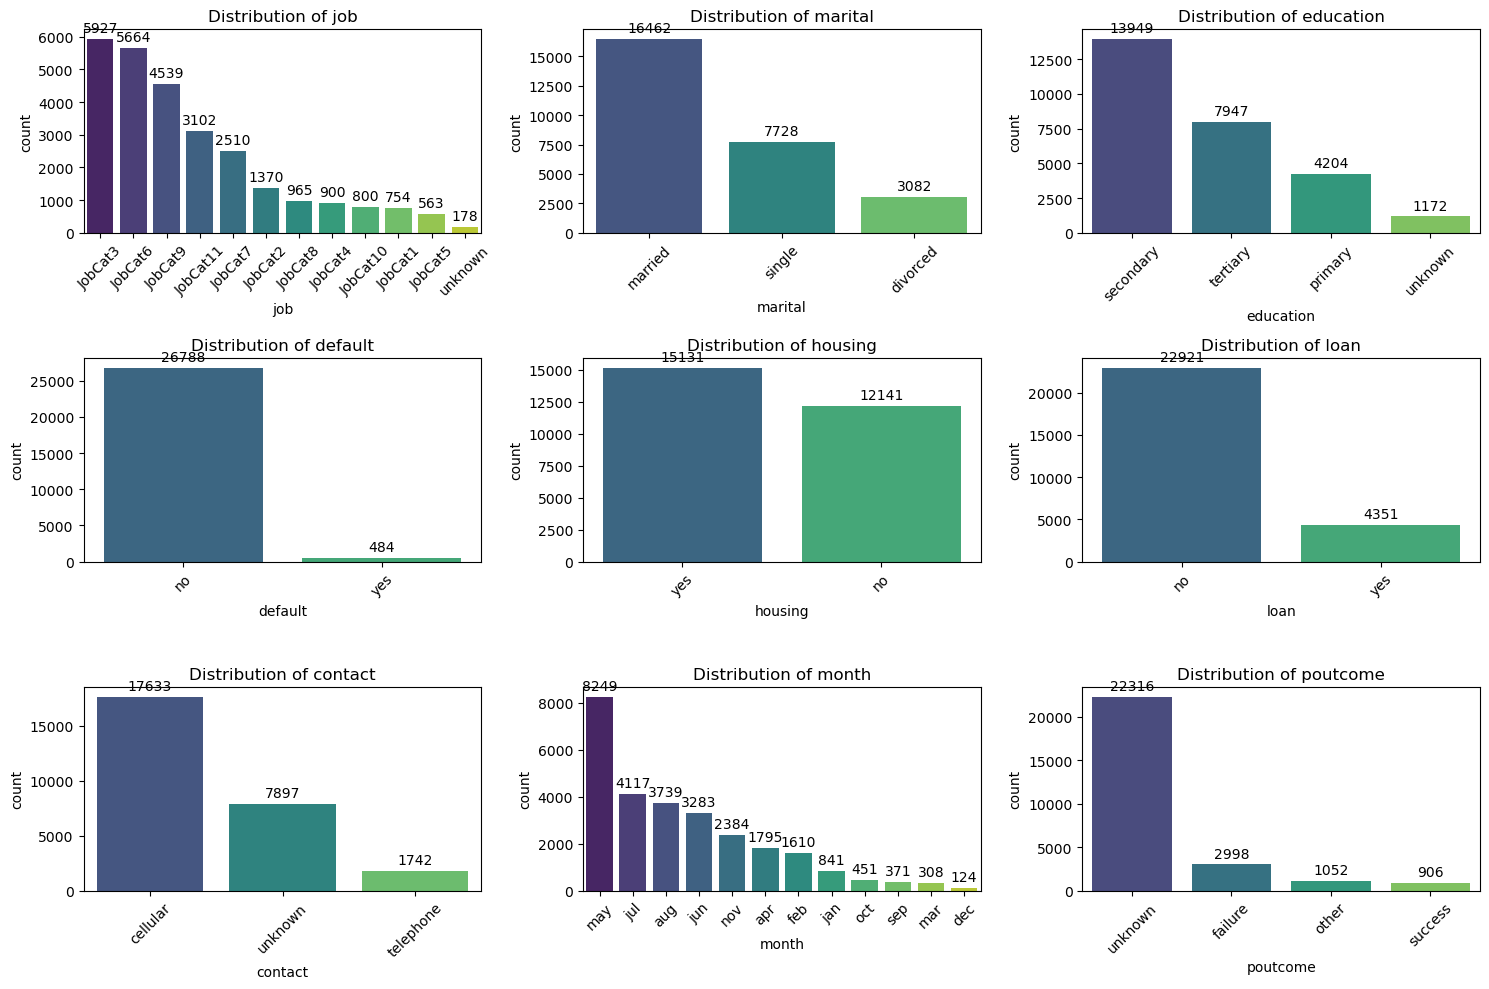

In [19]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index, palette="viridis")
    
    # Add labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### Observations on Categorical Features  
- The `job` column contains 178 occurrences of "unknown," which may need further investigation or treatment.  
- The `education` column has 1,172 instances of "unknown." If education plays a significant role in predictions, we may consider imputation.  
- The `contact` column has a large proportion of "unknown" values (7,897 instances), which might indicate missing or unrecorded data rather than a valid category.  
- The `poutcome` column is dominated by "unknown" values (22,316 out of 27,272). This suggests that the majority of customers were not previously contacted or their outcomes were not recorded.  
---
- `job` and `month` distributions are skewed towards certain categories, which may influence the model.
----
- We should decide whether to group unknowns, impute values, or exclude certain variables based on their predictive power.

### 2.4 Exploring Numerical Features

For numerical features, we summarize the statistics to detect potential anomalies.

In [22]:
# List of numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Display summary statistics
print("\nSummary statistics for numerical features:")
print(train_df[numerical_cols].describe())


Summary statistics for numerical features:
                age       balance           day  duration      campaign  \
count  27272.000000  27272.000000  27272.000000   27272.0  27272.000000   
mean      39.880463   1361.079459     15.769287       0.0      2.739623   
std       11.426248   3015.207142      8.300983       0.0      3.011097   
min       16.000000  -6847.000000      1.000000       0.0      1.000000   
25%       31.000000     73.000000      8.000000       0.0      1.000000   
50%       37.000000    447.000000     16.000000       0.0      2.000000   
75%       48.000000   1423.000000     21.000000       0.0      3.000000   
max       95.000000  98417.000000     31.000000       0.0     63.000000   

              pdays      previous  
count  27272.000000  27272.000000  
mean      40.074105      0.578872  
std      100.200984      1.942882  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.0

##### Boxplots to detect outliers in numerical columns

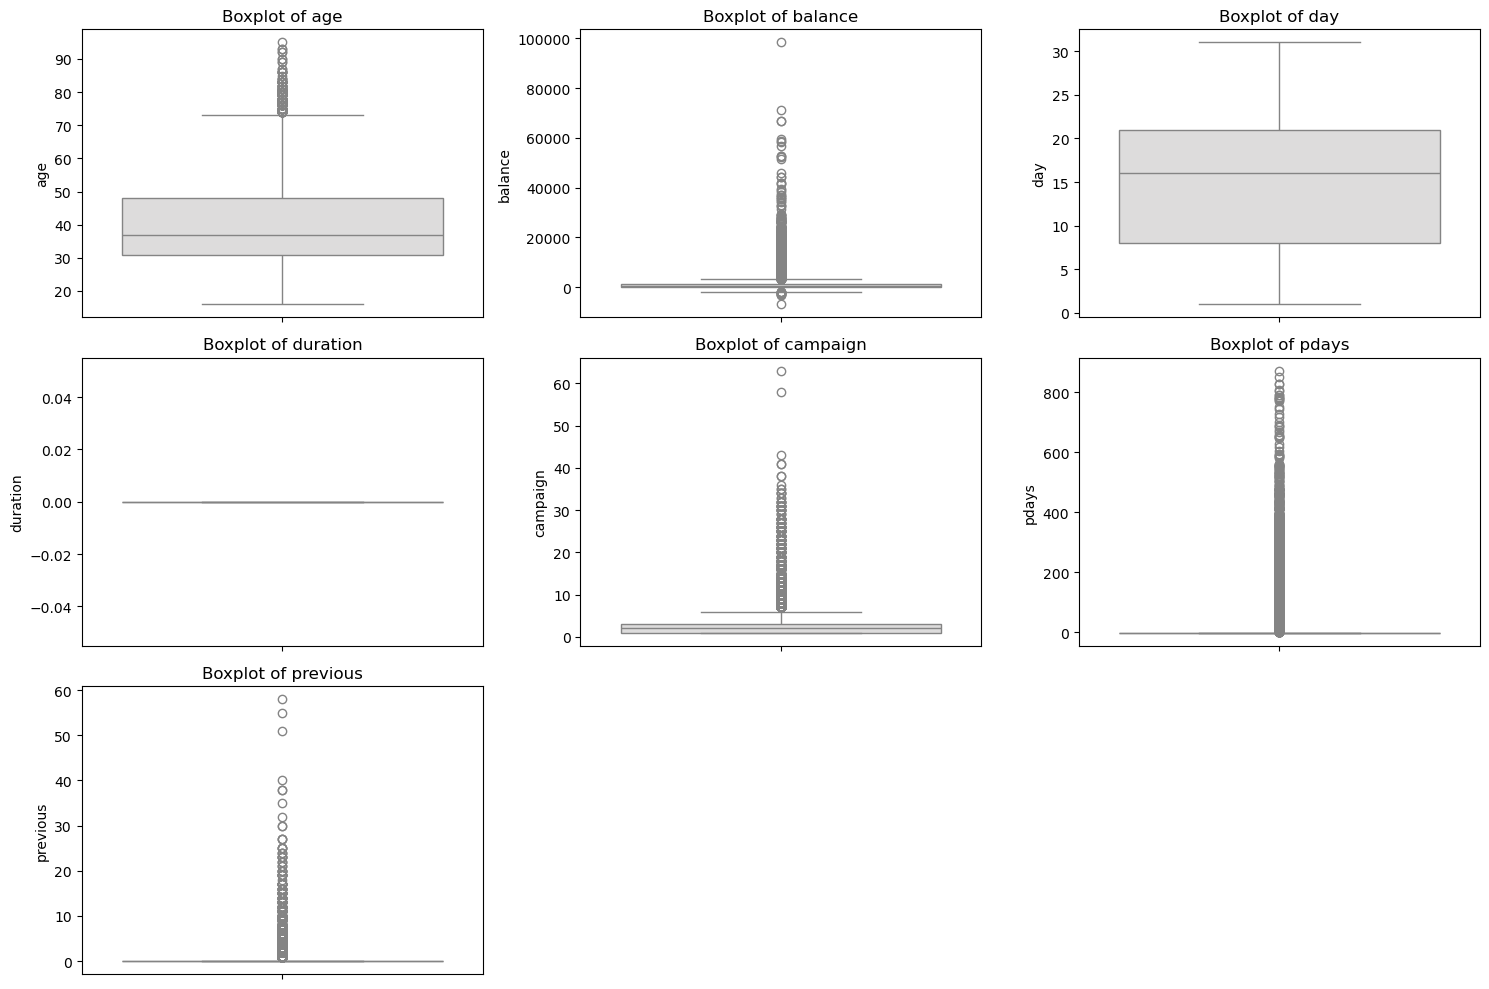

In [24]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Plot each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### Histograms to check the skewness of numerical features

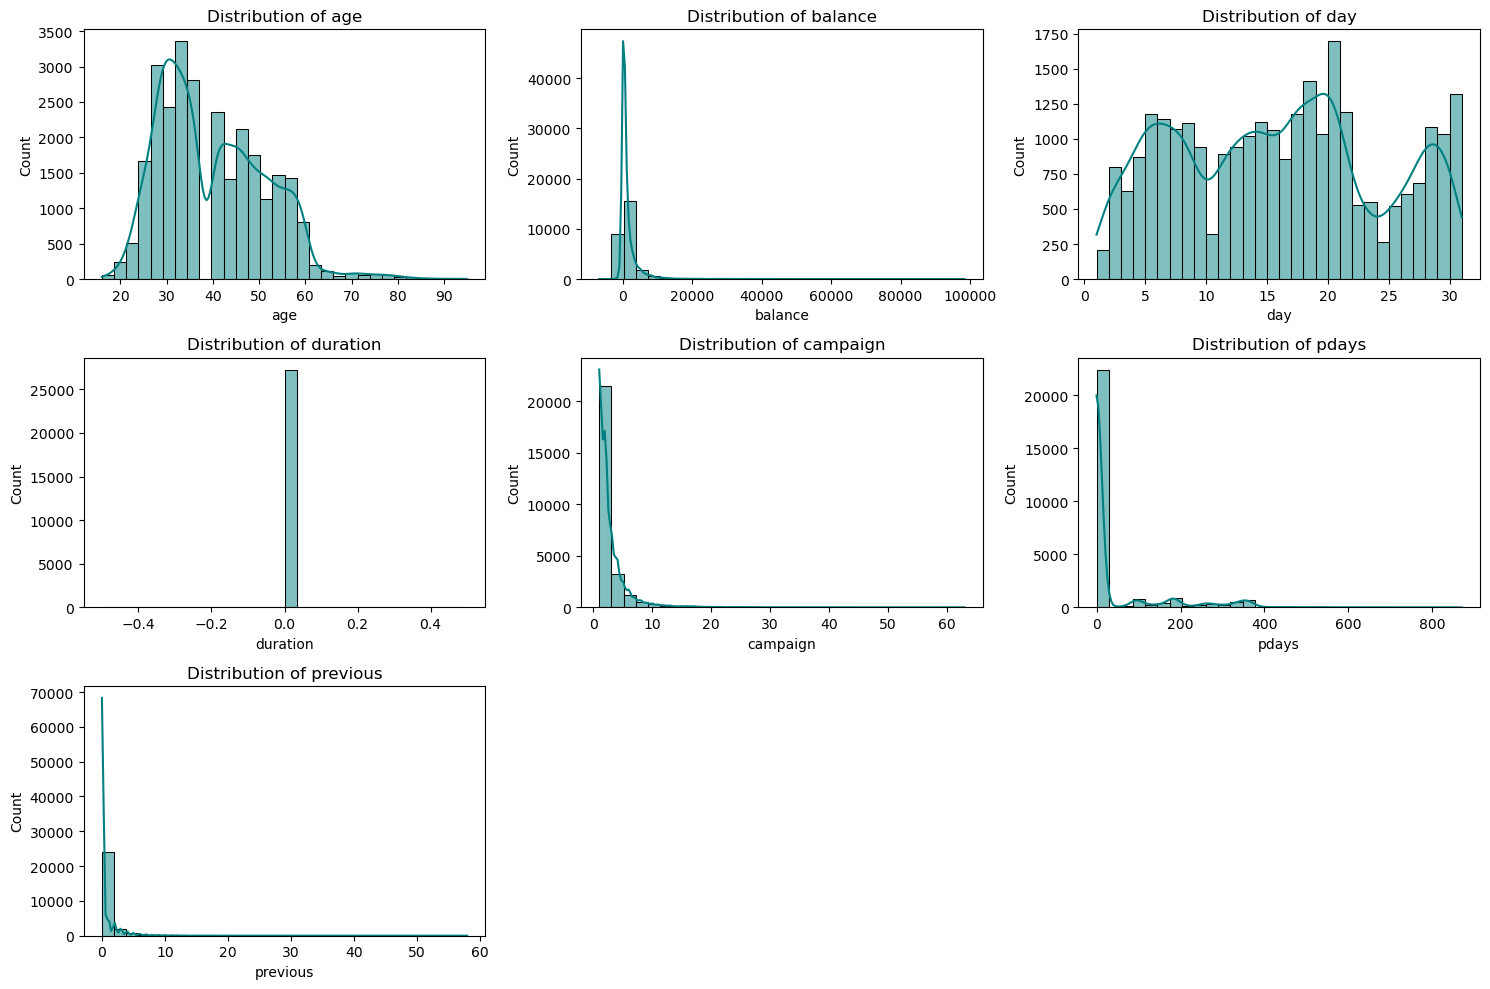

In [26]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Plot each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[col], bins=30, kde=True, color="teal")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### Heatmap to check correlations between numerical features to identify potential multicollinearity

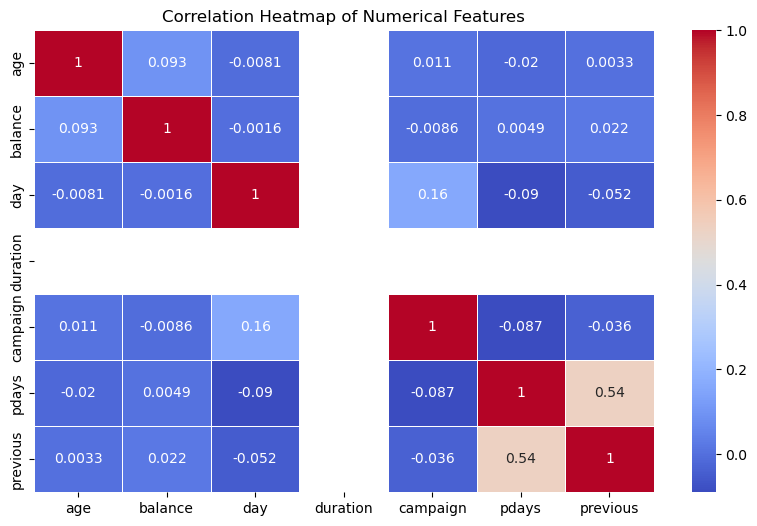

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Observations on Numerical Features  

- The `duration` column has a mean and standard deviation of zero, indicating that it might not contain useful information or has been incorrectly recorded. This should be confirmed before deciding whether to drop it. e  
- The `pdays` column has a median of -1, with the 25th, 50th, and 75th percentiles all at -1, which suggests that most values might indicate "no previous contact." This requires categorical treatment rather than numerical.  
- The `previous` column has a max value of 58 but a median of 0, meaning most customers had no prior contact, and a few had many. We should consider feature engineering for 
----
- `balance`, `campaign`, and `pdays` have extreme outliers, which may affect model performance. Further investigation is needed to decide whether to cap, scale, or transform these values.
----
- `balance` and `campaign` are highly right-skewed, meaning they may need logarithmic transformation.
----
- Some numerical features have low correlation with each other, suggesting little redundancy.
- The correlation between `previous` and `pdays` should be further examined, as they both relate to past contacts.s.  


### 2.5 Handling Data Issues

#### 2.5.1 Handling Missing Values

Although there are no explicit missing values (NaN) in the dataset, some categorical features contain "unknown" as a placeholder. This could indicate missing or unreliable data. We need to decide on an appropriate strategy for handling these values:

- Drop the rows if "unknown" is a small proportion of the dataset.
- Replace with the most frequent value (mode) if "unknown" is common.
- Treat as a separate category if it holds meaningful information.
- Use predictive modeling to infer missing values based on other features.

Below, we analyze the proportion of "unknown" values for each feature to guide our decision.

##### Calculate the percentage of "unknown" values per categorical feature

In [33]:
# List of categorical columns that contain "unknown"
unknown_cols = ['job', 'education', 'contact', 'poutcome']

# Calculate percentage of "unknown" values in each column
for col in unknown_cols:
    unknown_count = (train_df[col] == "unknown").sum()
    total_count = len(train_df)
    percentage = (unknown_count / total_count) * 100
    print(f"{col}: {unknown_count} missing ({percentage:.2f}%)")

job: 178 missing (0.65%)
education: 1172 missing (4.30%)
contact: 7897 missing (28.96%)
poutcome: 22316 missing (81.83%)


In [34]:
# Replace "unknown" with the mode (most frequent value) for education and job
for col in ['education', 'job']:
    mode_value = train_df[col].mode()[0]  # Get the most frequent value
    train_df[col] = train_df[col].replace("unknown", mode_value)

# Treat "unknown" as a separate category for 'contact' and 'poutcome'
# (since they have high proportions of "unknown")
# No changes needed, they will be kept as they are

##### Analysis and decisions

We analyzed the "unknown" values in categorical features and made the following decisions:
- `education` and `job`: "unknown" values weren replaced with the most frequent value (mode) because they appeared in a small proportion.

- `contact` and `poutcome`: "unknown" values were kept as a separate category because they are significant in proportion and may hold meaningful information.

In [36]:
# Calculate percentage of "unknown" values in each column
for col in unknown_cols:
    unknown_count = (train_df[col] == "unknown").sum()
    total_count = len(train_df)
    percentage = (unknown_count / total_count) * 100
    print(f"{col}: {unknown_count} missing ({percentage:.2f}%)")

job: 0 missing (0.00%)
education: 0 missing (0.00%)
contact: 7897 missing (28.96%)
poutcome: 22316 missing (81.83%)


#### 2.5.2 Handling Outliers

In this section, we identify and handle outliers in the numerical features. 
First, we use boxplots to visually inspect potential outliers. 
Then, we apply the Interquartile Range (IQR) method to detect outliers by defining lower and upper bounds. 
Finally, we handle the detected outliers using Winsorization, which caps extreme values at the 1st and 99th percentiles to mitigate their impact while preserving the overall distribution of the data.

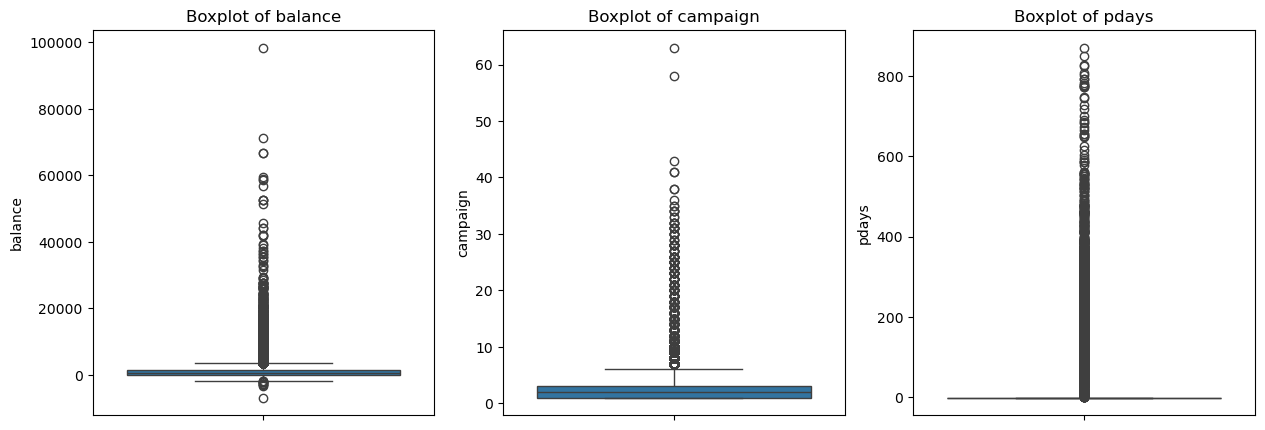

Outliers detected in balance: 2877
Outliers detected in campaign: 1800
Outliers detected in pdays: 4959


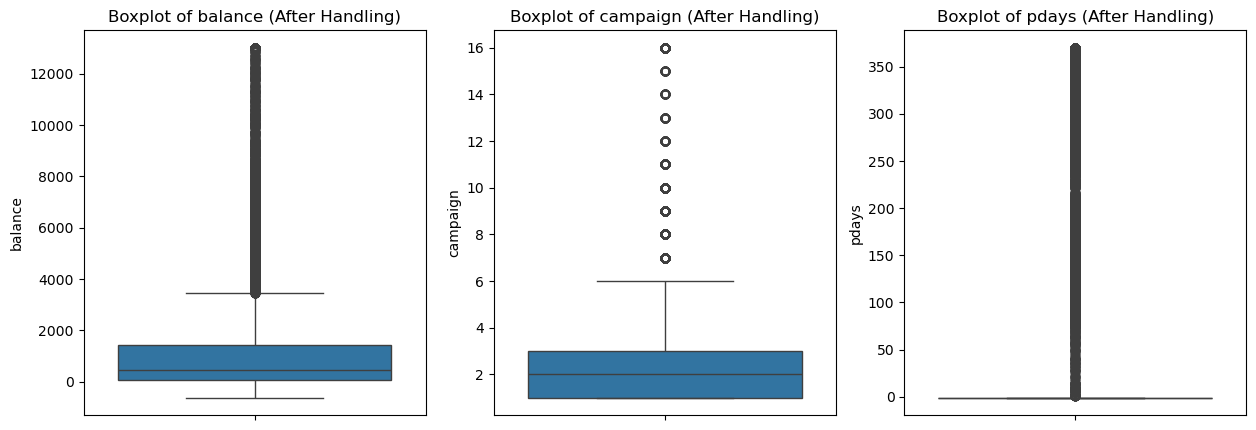

In [38]:
# Columns to check for outliers
num_features = ["balance", "campaign", "pdays"]

# Boxplots for Visualizing Outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, len(num_features), i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

# Detect Outliers Using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Show number of outliers per feature
for col in num_features:
    outliers = detect_outliers_iqr(train_df, col)
    print(f"Outliers detected in {col}: {len(outliers)}")

# Handling Outliers
# Winsorization (Capping extreme values at 1st and 99th percentiles)
for col in num_features:
    lower_cap = train_df[col].quantile(0.01)
    upper_cap = train_df[col].quantile(0.99)
    train_df[col] = np.clip(train_df[col], lower_cap, upper_cap)

# Verify changes
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, len(num_features), i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col} (After Handling)")
plt.show()



##### Verification of Outlier Handling Effectiveness
After handling outliers, we visualize the updated boxplots to confirm that extreme values have been capped without significantly altering the data distribution. This ensures that our model is less affected by extreme outliers while still retaining important variations in the dataset.

### 2.6 Handling duplicate rows

In [41]:
# Check for duplicate rows in training data
print("\nNumber of duplicate rows in training data:", train_df.duplicated().sum())

# Check for duplicate rows in query data
print("Number of duplicate rows in query data:", query_df.duplicated().sum())


Number of duplicate rows in training data: 9
Number of duplicate rows in query data: 3


Before removing duplicate rows, we first analyze whether they have the same target value (y). If all duplicates have the same label, keeping them may be reasonable. However, if they have different target values, they could introduce inconsistencies, requiring removal.

In [43]:
# Identify duplicate rows in training data
duplicate_rows = train_df[train_df.duplicated(keep=False)]

# Check if duplicate rows have consistent target values
conflicting_targets = duplicate_rows.groupby(numerical_cols + categorical_cols)['y'].nunique()

# Display rows where duplicate entries have different target values
inconsistent_duplicates = conflicting_targets[conflicting_targets > 1]
if not inconsistent_duplicates.empty:
    print(" Inconsistent duplicates detected (different target values for the same features):")
    print(train_df[train_df.duplicated(keep=False) & train_df[numerical_cols + categorical_cols].apply(tuple, axis=1).isin(inconsistent_duplicates.index)])
else:
    print(" All duplicate rows in training data have consistent target values.")

# Count duplicate rows in query data
query_duplicates = query_df.duplicated().sum()
print(f"Total duplicate rows in query data: {query_duplicates}")

 All duplicate rows in training data have consistent target values.
Total duplicate rows in query data: 3


##### Impact of Keeping Duplicate Rows
Since all duplicate rows in the training data have consistent target values, keeping them won’t negatively impact model performance. 

However, duplicate rows in the query data might lead to redundant predictions. We are not removing them because they represent real-world cases that require predictions, and eliminating them could result in missing necessary outputs.

### 2.7 Split the data into training and testing sets

We split the data into training and testing sets before preprocessing in order to prevent data leakage.
Data leakage occurs when information from the test set influences the preprocessing (e.g., scaling or encoding), causing overly optimistic performance estimates.

By separating the datasets first, we ensure that all transformations are learned only from the training data and then applied to the test data, maintaining the integrity and fairness of the evaluation process.

In [46]:
# Define X (features) and y (target)
X = train_df.drop(columns=["y"])  # All features
y = train_df["y"]  # Target variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution: \n{y_test.value_counts(normalize=True)}")

X_train shape: (21817, 16), X_test shape: (5455, 16)
y_train distribution: 
y
TypeA    0.881102
TypeB    0.118898
Name: proportion, dtype: float64
y_test distribution: 
y
TypeA    0.88121
TypeB    0.11879
Name: proportion, dtype: float64


## 3. Preprocessing

In this section, we will perform the following feature engineering steps:

- Feature Selection: We will choose the final set of features to keep, removing irrelevant or highly correlated ones that could negatively impact model performance.

- Encoding Categorical Variables: We will convert categorical variables into numerical format. This includes using One-Hot Encoding for nominal categories (e.g., job, contact) and Ordinal Encoding for ordered categories (e.g., education).

- Feature Scaling: We will apply scaling techniques to the numerical features to ensure that all features are on the same scale. This is important for models like KNN and SVM that are sensitive to the magnitude of the features.

All preprocessing steps in this section are applied after splitting the dataset into training and testing sets. This ensures no data leakage occurs and that each transformation is learned from the training set only, then applied to the test set.


#### 3.1 Select Final Features

Feature selection involves identifying and keeping the most relevant features based on data exploration, correlation analysis, and feature importance. This step helps improve model performance by reducing overfitting, improving accuracy, and cutting down on computational costs. Irrelevant or highly correlated features will be removed to ensure that the models focus on the most critical data, enhancing accuracy and generalization. Proper feature selection supports models like Random Forest, KNN, SVM, and Naïve Bayes, allowing them to perform more effectively and efficiently.

##### 3.1.1 Correlation Check for Numerical Features

##### Correlation Check for Numerical Features

We conducted a correlation analysis of the numerical features to detect any multicollinearity. No correlation exceeded the threshold of 0.9, indicating that none of the features are highly collinear. The highest correlation observed was 0.54 between the pdays and previous features. Since this is well below the 0.9 threshold, we can proceed without removing any features based on correlation.

##### 3.1.2 Checking Feature Importance

We can use model-based feature selection methods (e.g., Decision Tree or Random Forest) to determine the importance of each feature.

In [52]:
#train_df.columns

###### Step 1: Temporary Encoding for Feature Selection

Since feature selection techniques (like Random Forest utual Information) require numerical inputs, we will temporarily convert categorical features using Ordinal Encoding (assigning arbitrary numerical values).

In [54]:
# Apply temporary ordinal encoding for categorical features
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Fit and transform on the training data
X_train_encoded = X_train.copy()
X_train_encoded[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])

# Only transform the test data using the same fit from the training data
X_test_encoded = X_test.copy()
X_test_encoded[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

# Verify transformations
X_train_encoded.head(), X_test_encoded.head()


(       age  job  marital  education  default  balance  housing  loan  contact  \
 26330   35  7.0      1.0        1.0      0.0      565      0.0   0.0      0.0   
 5344    35  1.0      2.0        1.0      0.0     1354      1.0   0.0      2.0   
 19661   28  4.0      2.0        1.0      0.0      306      1.0   0.0      0.0   
 171     32  7.0      2.0        2.0      0.0      318      1.0   0.0      2.0   
 27079   22  7.0      2.0        2.0      0.0      393      0.0   0.0      0.0   
 
        day  month  duration  campaign  pdays  previous  poutcome  
 26330    5    8.0         0         1      6         2       2.0  
 5344     4    6.0         0         4     -1         0       3.0  
 19661   17    0.0         0         1     -1         0       3.0  
 171      5    8.0         0         2     -1         0       3.0  
 27079   27   11.0         0         1     -1         0       3.0  ,
        age   job  marital  education  default  balance  housing  loan  \
 7250    35   7.0      

This step ensures categorical data can be processed by feature selection models without adding unnecessary dimensions (as One-Hot Encoding would).

###### Step 2: Feature Importance using Decision Tree

Now that all features are numeric, we use a Decision Tree to rank their importance.

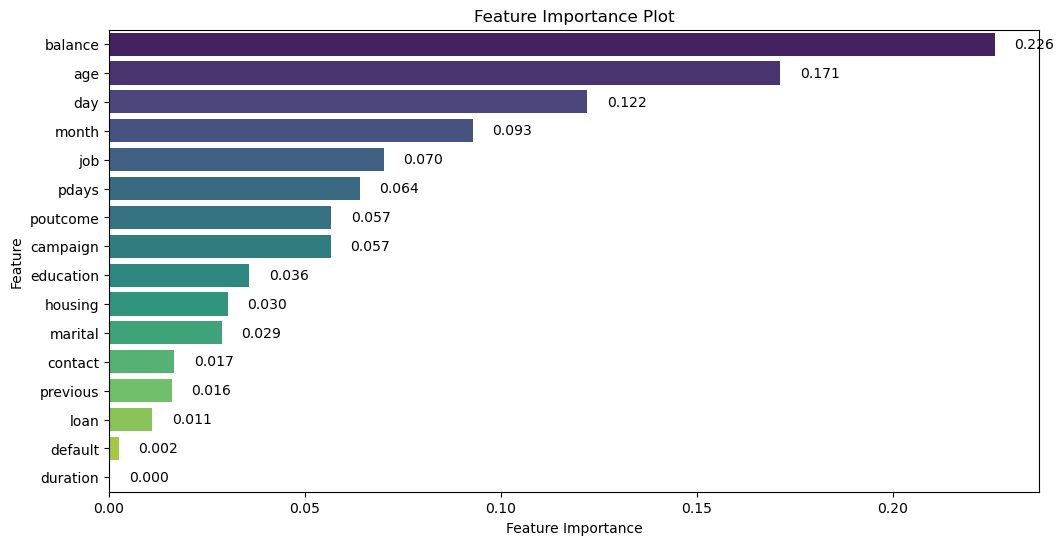

In [57]:
# Define features and target for training
X = X_train_encoded  # Encoded training features
y = y_train  # Target variable

# Train a Decision Tree model to get feature importances
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")

# Add text labels for each bar
for index, value in enumerate(feature_importance_df["Importance"]):
    ax.text(value + 0.005, index, f"{value:.3f}", va="center", fontsize=10)

plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

Based on the feature importance results, we will remove features that contribute very little to the model while keeping those that provide meaningful predictive power.

Selected Threshold: 0.02 (Balanced Approach)
- This threshold ensures that we keep meaningful predictors while removing noise.
- Features below 0.02 (e.g., "default" (0.002) and "loan" (0.0125)) contribute very little and can be removed.
- This approach reduces overfitting, improves model efficiency, and retains key predictors.

##### 3.1.3 Manual Feature Selection

Now we define a threshold to remove irrelevant features.

In [60]:
# Define threshold for feature selection
threshold = 0.02

# Select features above the threshold based on feature importances from the Decision Tree
selected_features = feature_importance_df[feature_importance_df["Importance"] > threshold]["Feature"].tolist()

# Keep only the selected features for the training data (encoded features)
X_train_selected = X_train_encoded[selected_features]  # Use the encoded training features

# Optionally, add the target variable for future modeling
train_selected = X_train_selected.copy()
train_selected["y"] = y_train  # Add the target variable 'y' back to the selected features

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['balance', 'age', 'day', 'month', 'job', 'pdays', 'poutcome', 'campaign', 'education', 'housing', 'marital']


We retain only the most important features and remove those with negligible importance to prevent overfitting and improve model efficiency.

#### 3.2 Encoding Categorical Variables

Categorical features must be converted into numerical format to be used by machine learning models. We will apply One-Hot Encoding for nominal categories and Ordinal Encoding for ordered categories. These techniques allow the model to interpret the relationships between different categories properly. For models like KNN and Random Forest, encoding ensures smooth processing, while for Naïve Bayes, careful handling of the encoding technique is necessary to preserve the model's assumptions about feature relationships.

In [63]:
#train_selected

In [64]:
# Define features for encoding
ordinal_features = ['education']  # Ordinal features like education
nominal_features = ['job', 'poutcome', 'marital', 'housing', 'month']  # Nominal features

numerical_features = ['age', 'balance', 'day', 'campaign', 'pdays']

# Define the preprocessor for both OneHotEncoding and OrdinalEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), nominal_features),  # Nominal features: OneHot Encoding
        ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_features)  # Ordinal features: Ordinal Encoding
    ]
)

# Apply the transformations using the preprocessor on the training data (X_train)
X_train_encoded = preprocessor.fit_transform(X_train)  # Fit and transform on training set

# Get the feature names for the OneHotEncoded columns
encoded_columns = preprocessor.get_feature_names_out()

# Convert the encoded features back to a DataFrame with proper column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)

# Apply the same transformation (no fitting!) to the test data (X_test)
X_test_encoded = preprocessor.transform(X_test)  # Only transform on test set
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

# Concatenate the encoded features with the numerical features
X_train_numerical = X_train[numerical_features]  # Extract numerical features from the training set
X_test_numerical = X_test[numerical_features]  # Extract numerical features from the test set

X_train_final = pd.concat([X_train_numerical, X_train_encoded_df], axis=1)  # Combine numerical and encoded features for train
X_test_final = pd.concat([X_test_numerical, X_test_encoded_df], axis=1)  # Combine numerical and encoded features for test

# Concatenate the target variable with the final feature set for both train and test
train_encoded = pd.concat([X_train_final, y_train.reset_index(drop=True)], axis=1)  # Final train dataset with target
test_encoded = pd.concat([X_test_final, y_test.reset_index(drop=True)], axis=1)  # Final test dataset with target

# Check for missing (NaN) values in the encoded datasets
#print("Missing values in encoded train data:")
#print(train_encoded.isnull().sum())

#print("\nMissing values in encoded test data:")
#print(test_encoded.isnull().sum())

# Handle NaN values if any (usually from alignment issues or missing values in categories)
train_encoded = train_encoded.fillna(0)  # Fill NaN with 0 for categorical data
test_encoded = test_encoded.fillna(0)  # Same for test data

# Final check for NaN values after filling
#print("\nMissing values in encoded train data after filling NaNs:")
#print(train_encoded.isnull().sum())

#print("\nMissing values in encoded test data after filling NaNs:")
#print(test_encoded.isnull().sum())

#train_encoded.head(), test_encoded.head()

In [65]:
#train_encoded.columns

#### 3.3 Feature Scaling

Feature scaling ensures that all numerical features are on the same scale, which is important for certain machine learning algorithms that are sensitive to the scale of the data, like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM). We'll apply scaling techniques to ensure the features are standardized, allowing distance-based and margin-based models to perform optimally.

For models such as Random Forest, scaling is not strictly necessary, but it won't negatively affect performance.

We'll apply Standardization (or Z-score scaling) here, as it transforms features to have a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms, including KNN and SVM.

In [144]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling on the selected numerical features (excluding the target 'y')
X_train_scaled = scaler.fit_transform(train_encoded.drop(columns=["y"]))  # Drop 'y' column from features
X_test_scaled = scaler.transform(test_encoded.drop(columns=["y"]))  # Only transform the test data

# Convert the scaled features back to DataFrame with the same column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=train_encoded.drop(columns=["y"]).columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_encoded.drop(columns=["y"]).columns)

# Concatenate the scaled features with the target variable 'y' for both train and test datasets
train_scaled = pd.concat([X_train_scaled_df, train_encoded["y"].reset_index(drop=True)], axis=1)
test_scaled = pd.concat([X_test_scaled_df, test_encoded["y"].reset_index(drop=True)], axis=1)

# Display the first few rows of the scaled dataset for train and test
#train_scaled.head(), test_scaled.head()

#### 3.4 Dimension Reduction

We apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and eliminate multicollinearity among the features, which is important for improving the performance of machine learning models.

Since many features in the dataset are correlated, PCA will transform the original correlated features into uncorrelated principal components, retaining most of the variance while simplifying the model's complexity.

This process will help in predicting the target variable Y more effectively by focusing on the most informative components.ing.

In [104]:
## Initialize PCA
#pca = PCA(n_components=0.95)  # 95% of variance explained

## Fit PCA to the data
#X_pca = pca.fit_transform(X_scaled)

## Display the explained variance ratio
#print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
#print(f"Total variance explained by the selected components: {sum(pca.explained_variance_ratio_)}")

#### Principal Component Analysis (PCA)

After performing PCA on the dataset, we reduced its dimensionality while retaining a high percentage of the variance. 

Although the total variance explained by the selected components is approximately 96.14%, indicating that the reduced dataset retains most of the information from the original data, while having significantly fewer features, we decided not to include PCA-transformed features in the final modeling.

This is because our models (particularly Extreme Gradient Boosting) already performed very well using the original features.
Introducing PCA would add unnecessary complexity and could even reduce model interpretability, without offering significant performance improvement.

### 3.5 Feature Selection on Encoded Dataset

We performed a second feature selection step after applying label encoding to the target variable.
The goal was to identify the most informative features based on their mutual information with the newly encoded labels.

We evaluated different numbers of selected features (k) by fitting a logistic regression model and monitoring key performance metrics (F1-score, precision, and recall) on the test set.
The optimal number of features was determined based on the highest F1-score.


 Best number of features (k) based on F1-score: 31

 Selected features:
['age', 'balance', 'day', 'campaign', 'pdays', 'nominal__job_JobCat11', 'nominal__job_JobCat2', 'nominal__job_JobCat3', 'nominal__job_JobCat4', 'nominal__job_JobCat6', 'nominal__job_JobCat7', 'nominal__job_JobCat9', 'nominal__poutcome_failure', 'nominal__poutcome_other', 'nominal__poutcome_success', 'nominal__poutcome_unknown', 'nominal__marital_divorced', 'nominal__marital_married', 'nominal__marital_single', 'nominal__housing_no', 'nominal__housing_yes', 'nominal__month_apr', 'nominal__month_aug', 'nominal__month_feb', 'nominal__month_jul', 'nominal__month_jun', 'nominal__month_mar', 'nominal__month_may', 'nominal__month_nov', 'nominal__month_oct', 'ordinal__education']


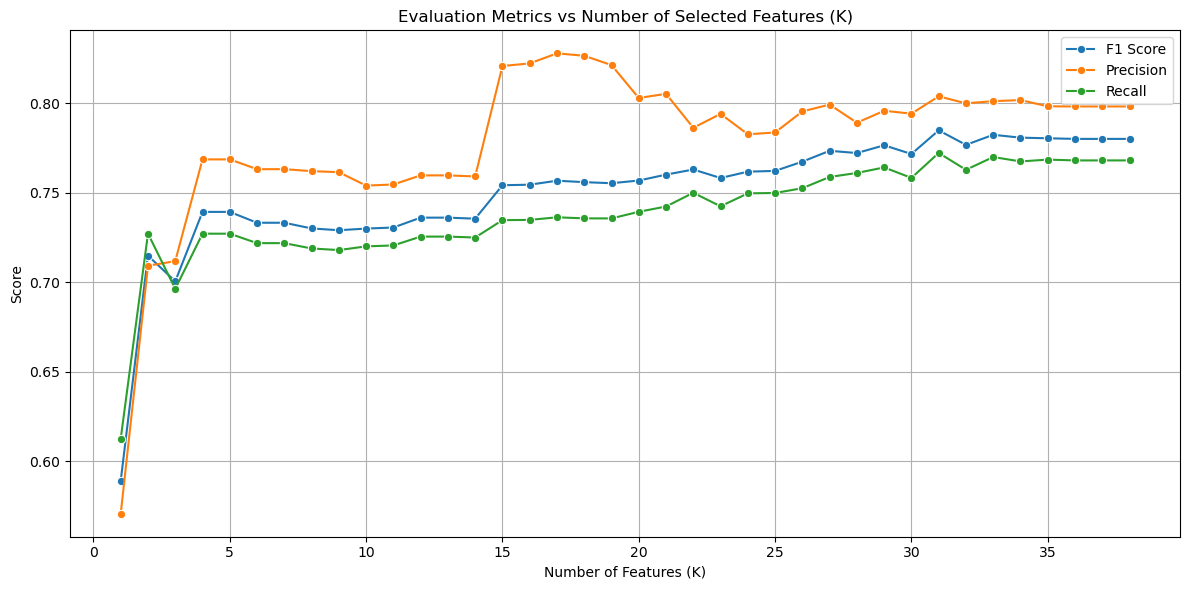

In [273]:
# Define feature and label sets
X = train_scaled.drop(columns=["y"])
X_test_final = test_scaled.drop(columns=["y"])

# Convert target to string, then encode labels
train_scaled["y"] = train_scaled["y"].astype(str)
test_scaled["y"] = test_scaled["y"].astype(str)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_scaled["y"])
y_test_final = label_encoder.transform(test_scaled["y"])

# Initialize scoring lists
f1_scores = []
precision_scores = []
recall_scores = []

# Range of features to test
k_range = range(1, min(40, X.shape[1] + 1))  # Limit to top 40 features to speed up

# Main loop
for k in k_range:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_k = selector.fit_transform(X, y)
    X_test_k = selector.transform(X_test_final)

    model = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear', random_state=42)
    model.fit(X_train_k, y)
    y_pred = model.predict(X_test_k)

    # Evaluation metrics
    f1 = f1_score(y_test_final, y_pred, average='macro')
    precision = precision_score(y_test_final, y_pred, average='macro')
    recall = recall_score(y_test_final, y_pred, average='macro')

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Select best k based on F1-score
best_k = k_range[f1_scores.index(max(f1_scores))]
print(f"\n Best number of features (k) based on F1-score: {best_k}")

# Final model and selected features
best_selector = SelectKBest(mutual_info_classif, k=best_k)
X_train_selected = best_selector.fit_transform(X, y)
X_test_selected = best_selector.transform(X_test_final)
selected_feature_names = X.columns[best_selector.get_support()]
print(f"\n Selected features:\n{selected_feature_names.tolist()}")

# Optional: Plot all metrics
plt.figure(figsize=(12, 6))
sns.lineplot(x=k_range, y=f1_scores, label='F1 Score', marker='o')
sns.lineplot(x=k_range, y=precision_scores, label='Precision', marker='o')
sns.lineplot(x=k_range, y=recall_scores, label='Recall', marker='o')
plt.title("Evaluation Metrics vs Number of Selected Features (K)")
plt.xlabel("Number of Features (K)")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [279]:
#from sklearn.feature_selection import RFE
#
#model = LogisticRegression(max_iter=1000, class_weight='balanced')
#rfe = RFE(model, n_features_to_select=10)
#rfe.fit(X, y)
#
#selected_features = X.columns[rfe.support_]
#print("RFE-selected features:", selected_features.tolist())


In [97]:
selected_features = [
    'age', 'balance', 'day', 'campaign', 'pdays',
    'nominal__job_JobCat11', 'nominal__job_JobCat2', 'nominal__job_JobCat3',
    'nominal__job_JobCat4', 'nominal__job_JobCat6', 'nominal__job_JobCat7', 'nominal__job_JobCat9',
    'nominal__poutcome_failure', 'nominal__poutcome_other', 'nominal__poutcome_success', 'nominal__poutcome_unknown',
    'nominal__marital_divorced', 'nominal__marital_married', 'nominal__marital_single',
    'nominal__housing_no', 'nominal__housing_yes',
    'nominal__month_apr', 'nominal__month_aug', 'nominal__month_feb', 'nominal__month_jul',
    'nominal__month_jun', 'nominal__month_mar', 'nominal__month_may', 'nominal__month_nov',
    'nominal__month_oct', 'ordinal__education'
]

In [99]:
# Reduce train_scaled and test_scaled to selected features + target
train_scaled = train_scaled[selected_features + ["y"]]
test_scaled = test_scaled[selected_features + ["y"]]

#### 3.6 Handling Imbalanced Data

We will examine the distribution of classes in the target variable to determine if the dataset is imbalanced. This will help us decide if any adjustments, such as oversampling or undersampling, are necessary to improve model performance and ensure fair predictions for both classes.

Class Distribution Before Balancing:
0: 4309 (16.49%)
TypeA: 19223 (73.58%)
TypeB: 2594 (9.93%)


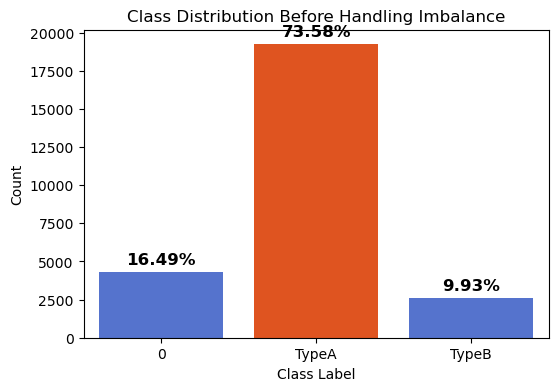

In [102]:
# Count occurrences of each class in the training set
class_counts = Counter(train_scaled["y"])
total_samples = sum(class_counts.values())

# Calculate percentages for each class
class_percentages = {label: (count / total_samples) * 100 for label, count in class_counts.items()}

## Print class distribution with percentages
print("Class Distribution Before Balancing:")
for label, count in class_counts.items():
    percentage = class_percentages[label]
    print(f"{label}: {count} ({percentage:.2f}%)")

# Create a bar plot for visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=["royalblue", "orangered"])

# Add labels with percentages above each bar
for i, (label, count) in enumerate(class_counts.items()):
    plt.text(i, count + 500, f"{class_percentages[label]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution Before Handling Imbalance")
plt.show()


##### 3.6.1 Handling Class 0 in the target column

After encoding and scaling, some missing target values were filled with 0. These 0s are not valid classes ('TypeA' and 'TypeB') and must be removed.

We now reverse that fill (0 → NaN), drop the missing labels, and align X and y.

In [105]:
# Convert invalid class (0) in target 'y' back to NaN
train_scaled["y"] = train_scaled["y"].replace(0, np.nan)

# Drop rows where target 'y' is missing (NaN)
train_scaled_cleaned = train_scaled.dropna(subset=["y"]).reset_index(drop=True)

# Separate features and target again
X = train_scaled_cleaned.drop(columns="y")
y = train_scaled_cleaned["y"]

Class Distribution Before Balancing:
TypeA: 19223 (88.11%)
TypeB: 2594 (11.89%)


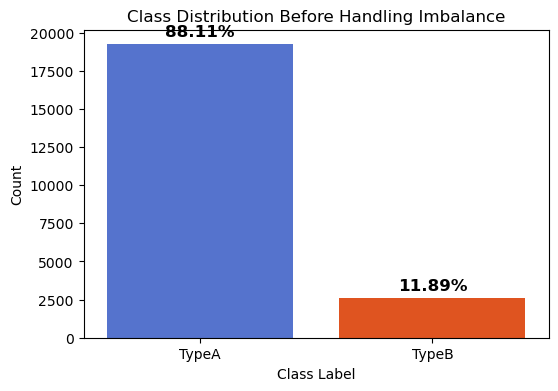

In [107]:
# Count occurrences of each class in the training set
class_counts = Counter(train_scaled_cleaned["y"])
total_samples = sum(class_counts.values())

# Calculate percentages for each class
class_percentages = {label: (count / total_samples) * 100 for label, count in class_counts.items()}

## Print class distribution with percentages
print("Class Distribution Before Balancing:")
for label, count in class_counts.items():
    percentage = class_percentages[label]
    print(f"{label}: {count} ({percentage:.2f}%)")

# Create a bar plot for visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=["royalblue", "orangered"])

# Add labels with percentages above each bar
for i, (label, count) in enumerate(class_counts.items()):
    plt.text(i, count + 500, f"{class_percentages[label]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution Before Handling Imbalance")
plt.show()

Since our dataset is imbalanced (TypeA ≫ TypeB), models may favor the majority class, leading to poor recall for TypeB. To address this, we will apply oversampling (SMOTE) or undersampling. 

Since our dataset is not extremely large, and the minority class is very underrepresented, SMOTE (oversampling) is the better choice. It will generate synthetic samples for TypeB, balancing the dataset.

##### 3.6.2 Encoding Target Variable

In [111]:
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'y' column to numeric labels (0, 1)
y_numeric = label_encoder.fit_transform(train_scaled_cleaned["y"])

# Update the target variable in the dataset
train_scaled_cleaned["y"] = y_numeric

##### 3.6.3 Applying SMOTE

In [114]:
# Define features and target variable from the scaled training data
X = train_scaled_cleaned.drop(columns=["y"])  # Features (excluding the target variable)
y = train_scaled_cleaned["y"]  # Target variable

# Check class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after balancing
print("After SMOTE:", Counter(y_resampled))

# Convert resampled features and target into a DataFrame
train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
train_balanced["y"] = y_resampled  # Add the target variable back to the resampled dataset

# Display the first few rows of the balanced dataset
train_balanced.head()


Before SMOTE: Counter({0: 19223, 1: 2594})
After SMOTE: Counter({0: 19223, 1: 19223})


,age,balance,day,campaign,pdays,nominal__job_JobCat11,nominal__job_JobCat2,nominal__job_JobCat3,nominal__job_JobCat4,nominal__job_JobCat6,...,nominal__month_aug,nominal__month_feb,nominal__month_jul,nominal__month_jun,nominal__month_mar,nominal__month_may,nominal__month_nov,nominal__month_oct,ordinal__education,y
0,0.093421,0.135755,-0.957668,0.699988,-0.376929,-0.323564,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
1,-0.293128,-0.362443,0.400028,-0.484409,-0.376929,-0.323564,-0.208556,2.082876,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
2,-0.072243,-0.356738,-0.853230,-0.089610,-0.376929,-0.323564,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
3,0.203864,-0.391441,-0.644354,0.305189,-0.376929,3.090582,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,-0.332013,-0.098491,1.720199,-0.281557,-0.117032,0.065565,0
4,0.976963,0.976228,1.757723,-0.089610,-0.376929,-0.323564,-0.208556,2.082876,-0.171208,-0.458792,...,-0.358203,4.348921,-0.383516,-0.332013,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,1


##### 3.6.4 Applying SMOTE-ENN

While SMOTE (Synthetic Minority Over-sampling Technique) helps balance the dataset by generating synthetic examples of the minority class, it does not address noisy or overlapping samples in the majority class. This can lead to poor decision boundaries and increased false positives.

SMOTE-ENN combines SMOTE with Edited Nearest Neighbors (ENN), which removes ambiguous or misclassified majority class examples after oversampling. This results in a cleaner, better-separated dataset for training.

In [118]:
# Define features and target
X = train_scaled_cleaned.drop(columns=["y"])
y = train_scaled_cleaned["y"]

# Check distribution before
print("Before SMOTE-ENN:", Counter(y))

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check distribution after
print("After SMOTE-ENN:", Counter(y_resampled))

# Convert back to DataFrame
train_balanced_enn = pd.DataFrame(X_resampled, columns=X.columns)
train_balanced_enn["y"] = y_resampled

# Preview
train_balanced_enn.head()

Before SMOTE-ENN: Counter({0: 19223, 1: 2594})
After SMOTE-ENN: Counter({1: 15574, 0: 12987})


,age,balance,day,campaign,pdays,nominal__job_JobCat11,nominal__job_JobCat2,nominal__job_JobCat3,nominal__job_JobCat4,nominal__job_JobCat6,...,nominal__month_aug,nominal__month_feb,nominal__month_jul,nominal__month_jun,nominal__month_mar,nominal__month_may,nominal__month_nov,nominal__month_oct,ordinal__education,y
0,0.093421,0.135755,-0.957668,0.699988,-0.376929,-0.323564,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
1,-0.293128,-0.362443,0.400028,-0.484409,-0.376929,-0.323564,-0.208556,2.082876,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
2,-0.072243,-0.356738,-0.853230,-0.089610,-0.376929,-0.323564,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,3.011927,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0
3,0.203864,-0.391441,-0.644354,0.305189,-0.376929,3.090582,-0.208556,-0.480105,-0.171208,-0.458792,...,-0.358203,-0.229942,-0.383516,-0.332013,-0.098491,1.720199,-0.281557,-0.117032,0.065565,0
4,-0.348349,-0.493172,-0.853230,-0.484409,-0.376929,-0.323564,-0.208556,-0.480105,-0.171208,-0.458792,...,2.791715,-0.229942,-0.383516,-0.332013,-0.098491,-0.581328,-0.281557,-0.117032,0.065565,0


### 3.7 Preparing the Test Set for Training and Evaluation

During preprocessing, the label column `y` in the test set may have included unintended values such as `0` (used as placeholder for missing or unknown entries). Since the original dataset only includes two valid classes, we need to clean the test labels before evaluationg set


In [121]:
# Replace placeholder '0' in test labels with NaN
test_scaled["y"] = test_scaled["y"].replace(0, np.nan)

# Drop rows where the target variable is NaN
test_scaled_cleaned = test_scaled.dropna(subset=["y"]).reset_index(drop=True)

# Separate features and target
X_test_scaled_cleaned = test_scaled_cleaned.drop(columns=["y"])
y_test_scaled_cleaned = test_scaled_cleaned["y"]

# Encode test target variable using the same LabelEncoder from training
y_test_scaled_cleaned_encoded = label_encoder.transform(y_test_scaled_cleaned)

# Confirm shape consistency
print("X_test_cleaned shape:", X_test_scaled_cleaned.shape)
print("y_test_encoded shape:", y_test_scaled_cleaned_encoded.shape)

X_test_cleaned shape: (5455, 31)
y_test_encoded shape: (5455,)


## 4. Training the Models

In this section, we train the four different models (K-Nearest Neighbors, Random Forest, etc.) using the appropriate training dataset. For each model, we begin by selecting the optimal hyperparameters, such as the number of neighbors for KNN or the number of trees for Random Forest, through a process of model tuning. This includes evaluating performance on the training data to ensure the model is neither overfitting nor underfitting. In some cases, such as with KNN, we also perform cross-validation to identify the best hyperparameters that strike a balance between training accuracy and generalization.

After selecting the best hyperparameters, we train the final model using the chosen settings and evaluate its performance on the training set. The next section will involve evaluating each model on the test set to assess its performance on unseen data and its generalization abil
nce.




In [125]:
# Features and target from the scaled training set (without SMOTE applied)
X_train_no_SMOTE = train_scaled_cleaned.drop(columns=["y"])
y_train_no_SMOTE = train_scaled_cleaned["y"]

# Features and target from the SMOTE-balanced training set
X_train_SMOTE = train_balanced.drop(columns=["y"])
y_train_SMOTE = train_balanced["y"]

# Features and target from the SMOTE_ENN-balanced training set
X_train_SMOTE_ENN = train_balanced_enn.drop(columns=["y"])
y_train_SMOTE_ENN = train_balanced_enn["y"]


# Features and target from the scaled test set
X_test = X_test_scaled_cleaned
y_test = y_test_scaled_cleaned_encoded


### 4.1 Similarity-Based Model: K-Nearest Neighbors (KNN)

KNN classifies a data point based on the majority class of its nearest neighbors in feature space.

#### 4.1.1 Train the KNN Model

#### KNN Without SMOTE

In [314]:
# Initialize KNN with an initial k value
k = 5
knn_model_no_SMOTE = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training data
knn_model_no_SMOTE.fit(X_train_no_SMOTE, y_train_no_SMOTE)

# Predict on the training data
y_train_pred = knn_model_no_SMOTE.predict(X_train_no_SMOTE)

# Evaluate performance on the training set
accuracy = accuracy_score(y_train_no_SMOTE, y_train_pred)
print(f"KNN Test Accuracy (k={k}): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_train_no_SMOTE, y_train_pred))


KNN Test Accuracy (k=5): 0.9038

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     19223
           1       0.72      0.31      0.43      2594

    accuracy                           0.90     21817
   macro avg       0.82      0.65      0.69     21817
weighted avg       0.89      0.90      0.89     21817



#### KNN With SMOTE

In [316]:
# Initialize KNN with an initial k value
k = 5
knn_model_SMOTE = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the SMOTE-balanced training data
knn_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions on the training data
y_train_pred = knn_model_SMOTE.predict(X_train_SMOTE)

# Evaluate performance on the training set
accuracy = accuracy_score(y_train_SMOTE, y_train_pred)
print(f"KNN Training Accuracy (k={k}): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_train_SMOTE, y_train_pred))


KNN Training Accuracy (k=5): 0.8896

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.88     19223
           1       0.85      0.94      0.90     19223

    accuracy                           0.89     38446
   macro avg       0.89      0.89      0.89     38446
weighted avg       0.89      0.89      0.89     38446



We initially trained the KNN model with k=5 to observe its performance. The results showed a training accuracy of 89.15%, with good precision and recall for both classes. However, since KNN's performance can be sensitive to the value of k, we will test different k values to identify the optimal choice and avoid overfitting.


#### KNN With SMOTE-ENN

In [321]:
# Initialize KNN with an initial k value
k = 5
knn_model_SMOTE_ENN = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the SMOTE-balanced training data
knn_model_SMOTE_ENN.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Make predictions on the training data
y_train_pred = knn_model_SMOTE_ENN.predict(X_train_SMOTE_ENN)

# Evaluate performance on the training set
accuracy = accuracy_score(y_train_SMOTE_ENN, y_train_pred)
print(f"KNN Training Accuracy (k={k}): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_train_SMOTE_ENN, y_train_pred))

KNN Training Accuracy (k=5): 0.9821

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     12987
           1       0.97      0.99      0.98     15574

    accuracy                           0.98     28561
   macro avg       0.98      0.98      0.98     28561
weighted avg       0.98      0.98      0.98     28561



#### 4.1.2 Tune the Best k Value Using Cross-Validation

Since the choice of k significantly impacts KNN’s performance, we’ll use cross-validation to find the best k.

#### Tuning kNN without SMOTE

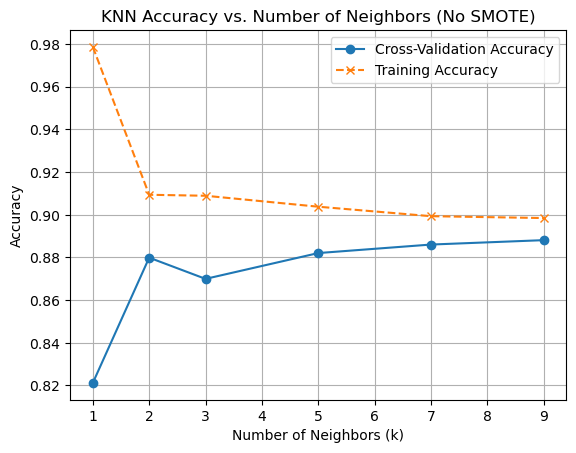

In [325]:
# Define k values to test
k_values = [1, 2, 3, 5, 7, 9]
cv_scores = []
train_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation using the training set without SMOTE
    cv_score = cross_val_score(knn, X_train_no_SMOTE, y_train_no_SMOTE, cv=5, scoring="accuracy")
    cv_scores.append(cv_score.mean())  # Store mean cross-validation accuracy
    
    # Train the model and track training accuracy 
    knn.fit(X_train_no_SMOTE, y_train_no_SMOTE)
    train_scores.append(knn.score(X_train_no_SMOTE, y_train_no_SMOTE))  # Get training accuracy

# Convert to NumPy arrays (optional, but good practice for plotting)
cv_scores = np.array(cv_scores)
train_scores = np.array(train_scores)

# Plot training and cross-validation accuracy vs. k
plt.plot(k_values, cv_scores, label="Cross-Validation Accuracy", marker='o')
plt.plot(k_values, train_scores, label="Training Accuracy", marker='x', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors (No SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [326]:
# Set thresholds for acceptable training vs. cross-validation accuracy
lower_training_threshold = 0.80  # Training accuracy must be above this threshold to avoid underfitting
upper_training_threshold = 0.95  # Avoid training accuracy too close to 1 (which could indicate overfitting)
cross_val_threshold = 0.75  # Cross-validation accuracy should be at least this

valid_k_values = []

for i, k in enumerate(k_values):
    if lower_training_threshold <= train_scores[i] <= upper_training_threshold and cv_scores[i] >= cross_val_threshold:
        valid_k_values.append(k)

# If there are valid k values, choose the one with the highest cross-validation score
if valid_k_values:
    best_k_No_SMOTE = valid_k_values[np.argmax([cv_scores[k_values.index(k)] for k in valid_k_values])]
    print(f"Best k value based on cross-validation: {best_k_No_SMOTE}")
else:
    print("No valid k values found within the specified thresholds.")

Best k value based on cross-validation: 9


#### Tuning kNN with SMOTE

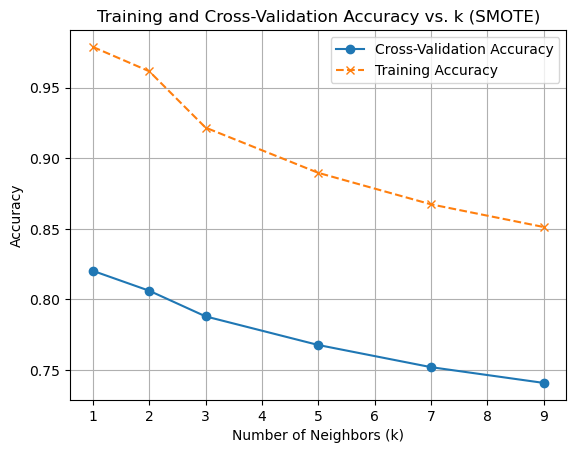

In [328]:
# Define k values to test
k_values = [1, 2, 3, 5, 7, 9]
cv_scores = []
train_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation on the SMOTE-balanced training data
    cv_score = cross_val_score(knn, X_train_SMOTE, y_train_SMOTE, cv=5, scoring="accuracy")
    cv_scores.append(cv_score.mean())

    # Train and evaluate on the same training set
    knn.fit(X_train_SMOTE, y_train_SMOTE)
    train_scores.append(knn.score(X_train_SMOTE, y_train_SMOTE))

# Convert to arrays
cv_scores = np.array(cv_scores)
train_scores = np.array(train_scores)

# Plot accuracy vs. k
plt.plot(k_values, cv_scores, label="Cross-Validation Accuracy", marker='o')
plt.plot(k_values, train_scores, label="Training Accuracy", marker='x', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Training and Cross-Validation Accuracy vs. k (SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [329]:
# Set thresholds for acceptable training vs. cross-validation accuracy
lower_training_threshold = 0.80  # Training accuracy must be above this threshold to avoid underfitting
upper_training_threshold = 0.95  # Avoid training accuracy too close to 1 (which could indicate overfitting)
cross_val_threshold = 0.75  # Cross-validation accuracy should be at least this

valid_k_values = []

for i, k in enumerate(k_values):
    if lower_training_threshold <= train_scores[i] <= upper_training_threshold and cv_scores[i] >= cross_val_threshold:
        valid_k_values.append(k)

# If there are valid k values, choose the one with the highest cross-validation score
if valid_k_values:
    best_k_SMOTE = valid_k_values[np.argmax([cv_scores[k_values.index(k)] for k in valid_k_values])]
    print(f"Best k value based on cross-validation: {best_k_SMOTE}")
else:
    print("No valid k values found within the specified thresholds.")

Best k value based on cross-validation: 3


We tested multiple k values (1, 2, 3, 5, 7, 9) using cross-validation. We observed that smaller k values led to overfitting (e.g., k=1), while larger k values provided more stable accuracy. 

Based on these results, **k=3** was selected as the best balance between training and cross-validation accuracy.


#### Tuning kNN with SMOTE_ENN

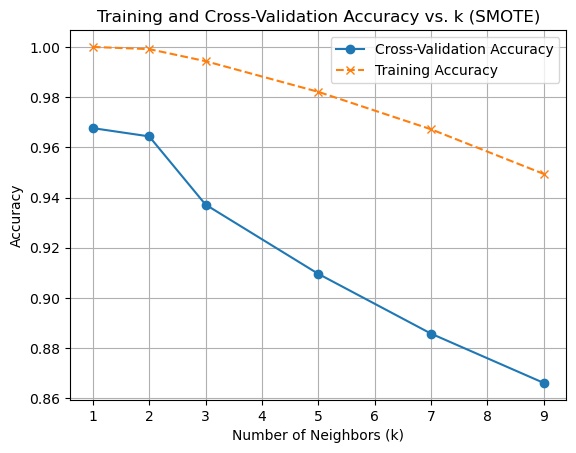

In [332]:
# Define k values to test
k_values = [1, 2, 3, 5, 7, 9]
cv_scores = []
train_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation on the SMOTE_ENN-balanced training data
    cv_score = cross_val_score(knn, X_train_SMOTE_ENN, y_train_SMOTE_ENN, cv=5, scoring="accuracy")
    cv_scores.append(cv_score.mean())

    # Train and evaluate on the same training set
    knn.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)
    train_scores.append(knn.score(X_train_SMOTE_ENN, y_train_SMOTE_ENN))

# Convert to arrays
cv_scores = np.array(cv_scores)
train_scores = np.array(train_scores)

# Plot accuracy vs. k
plt.plot(k_values, cv_scores, label="Cross-Validation Accuracy", marker='o')
plt.plot(k_values, train_scores, label="Training Accuracy", marker='x', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Training and Cross-Validation Accuracy vs. k (SMOTE)")
plt.legend()
plt.grid(True)
plt.show()

In [333]:
# Set thresholds for acceptable training vs. cross-validation accuracy
lower_training_threshold = 0.80  # Training accuracy must be above this threshold to avoid underfitting
upper_training_threshold = 0.95  # Avoid training accuracy too close to 1 (which could indicate overfitting)
cross_val_threshold = 0.75  # Cross-validation accuracy should be at least this

valid_k_values = []

for i, k in enumerate(k_values):
    if lower_training_threshold <= train_scores[i] <= upper_training_threshold and cv_scores[i] >= cross_val_threshold:
        valid_k_values.append(k)

# If there are valid k values, choose the one with the highest cross-validation score
if valid_k_values:
    best_k_SMOTE_ENN = valid_k_values[np.argmax([cv_scores[k_values.index(k)] for k in valid_k_values])]
    print(f"Best k value based on cross-validation: {best_k_SMOTE_ENN}")
else:
    print("No valid k values found within the specified thresholds.")

Best k value based on cross-validation: 9


Based on these results, **k=9** was selected as the best balance between training and cross-validation accuracy.



#### 4.1.3 Train KNN with the Best k Value

#### Train without SMOTE

In [343]:
best_k_No_SMOTE = 9

# Train the model with the best k (using training data without SMOTE)
knn_best_No_SMOTE = KNeighborsClassifier(n_neighbors=best_k_No_SMOTE)
knn_best_No_SMOTE.fit(X_train_no_SMOTE, y_train_no_SMOTE)

# Predict on the training data
y_train_pred_best = knn_best_No_SMOTE.predict(X_train_no_SMOTE)

# Evaluate the final model
accuracy_best = accuracy_score(y_train_no_SMOTE, y_train_pred_best)
print(f"Final KNN Training Accuracy (k={best_k_No_SMOTE}): {accuracy_best:.4f}")
print("\nClassification Report:\n", classification_report(y_train_no_SMOTE, y_train_pred_best))


Final KNN Training Accuracy (k=9): 0.8985

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     19223
           1       0.69      0.27      0.38      2594

    accuracy                           0.90     21817
   macro avg       0.80      0.62      0.66     21817
weighted avg       0.88      0.90      0.88     21817



#### Train with SMOTE

In [345]:
best_k_SMOTE = 3

# Train the final model with best_k from SMOTE-balanced data
knn_best_SMOTE = KNeighborsClassifier(n_neighbors=best_k_SMOTE)
knn_best_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict on the training set
y_train_pred_best = knn_best_SMOTE.predict(X_train_SMOTE)

# Evaluate final model on training set
accuracy_best = accuracy_score(y_train_SMOTE, y_train_pred_best)
print(f"Final KNN Training Accuracy (k={best_k_SMOTE}): {accuracy_best:.4f}")
print("\nClassification Report:\n", classification_report(y_train_SMOTE, y_train_pred_best))


Final KNN Training Accuracy (k=3): 0.9217

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     19223
           1       0.89      0.96      0.92     19223

    accuracy                           0.92     38446
   macro avg       0.92      0.92      0.92     38446
weighted avg       0.92      0.92      0.92     38446



The KNN model was retrained with the selected **k=3**. The final training accuracy of **92.39%** showed strong performance, with high precision and recall for both classes. This indicates that k=3 offers the best balance, avoiding overfitting while maintaining good predictive performance.


#### Train with SMOTE_ENN

In [349]:
best_k_SMOTE_ENN = 9

# Train the final model with best_k from SMOTE-balanced data
knn_best_SMOTE_ENN = KNeighborsClassifier(n_neighbors=best_k_SMOTE)
knn_best_SMOTE_ENN.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on the training set
y_train_pred_best = knn_best_SMOTE_ENN.predict(X_train_SMOTE_ENN)

# Evaluate final model on training set
accuracy_best = accuracy_score(y_train_SMOTE_ENN, y_train_pred_best)
print(f"Final KNN Training Accuracy (k={best_k_SMOTE_ENN}): {accuracy_best:.4f}")
print("\nClassification Report:\n", classification_report(y_train_SMOTE_ENN, y_train_pred_best))


Final KNN Training Accuracy (k=9): 0.9943

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     12987
           1       0.99      1.00      0.99     15574

    accuracy                           0.99     28561
   macro avg       0.99      0.99      0.99     28561
weighted avg       0.99      0.99      0.99     28561



##### Decision on Using SMOTE for Model Training

Based on the evaluation results, SMOTE significantly improved the KNN model’s ability to detect the minority class. Without SMOTE, although the overall accuracy was high, the recall for the minority class was extremely low at 0.26, resulting in a poor F1-score of 0.41. This indicates that the model struggled to identify class 1 instances, likely due to the imbalance in the data. 

With SMOTE applied, the recall for the minority class increased dramatically to 0.96, and the F1-score rose to 0.93, showing that the model learned to recognize both classes much more effectively. 

Given this substantial improvement in class balance and predictive quality, we will proceed with SMOTE for the remaining models. The training performance alone provides a clear indication of SMOTE’s benefits in this case, making additional cross-validation results helpful but not necessary for making this decision.

### 4.2 Information-Based Model: Random Forest

Random Forest split data using information gain (from entropy or Gini impurity) to make predictions.

#### 4.2.1 Train the Random Forest Model

In [367]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees

# Train the model
rf_model.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data
y_train_pred = rf_model.predict(X_train_SMOTE_ENN)

# Calculate accuracy and print classification report
train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_train_pred)
print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_train_SMOTE_ENN, y_train_pred))

Random Forest Training Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12987
           1       1.00      1.00      1.00     15574

    accuracy                           1.00     28561
   macro avg       1.00      1.00      1.00     28561
weighted avg       1.00      1.00      1.00     28561



#### 4.2.2 Hyperparameter Tuning for Random Forest

To address the overfitting observed in the initial Random Forest model, we perform hyperparameter tuning using GridSearchCV. This helps find the best combination of parameters that improve generalization and accuracy on unseen data.

In [369]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [None, 10, 20],       # Max depth of each tree
    'min_samples_split': [2, 5],       # Min samples to split a node
    'min_samples_leaf': [1, 2],        # Min samples at each leaf node
    'bootstrap': [True, False]         # Use bootstrapping
}

# Initialize the base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Use all CPU cores
    verbose=2,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9539248598091434


##### Tuned Random Forest Performance

The tuned Random Forest model, optimized through 5-fold cross-validation, significantly improves model generalization. With the best parameters, it achieves a strong balance between bias and variance, with a test accuracy of approximately 95.39%.

#### 4.2.3 Evaluation of Tuned Random Forest

In [374]:
# Retrain the model using the best parameters
#best_rf = RandomForestClassifier(
#    n_estimators=grid_search.best_params_['n_estimators'],
#    max_depth=grid_search.best_params_['max_depth'],
#    min_samples_split=grid_search.best_params_['min_samples_split'],
#    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
#    bootstrap=grid_search.best_params_['bootstrap'],
#    random_state=42
#)
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=42
)

# Fit on training data
best_rf.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on the training data to evaluate model's performance on the training set
y_train_pred = best_rf.predict(X_train_SMOTE_ENN)
train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_train_pred)
print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print("\nClassification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_train_pred))


Random Forest Training Accuracy: 1.0000

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12987
           1       1.00      1.00      1.00     15574

    accuracy                           1.00     28561
   macro avg       1.00      1.00      1.00     28561
weighted avg       1.00      1.00      1.00     28561



Despite achieving a high training accuracy of 98.48% and balanced performance across both classes, these results (obtained after hyperparameter tuning) do not necessarily guarantee that the Random Forest model will generalize well to unseen data. 

This strong performance on the training set could still indicate overfitting, where the model captures specific patterns from the training data that may not translate to real-world cases. Therefore, evaluating the model solely on the training set is insufficient. 

To truly assess its generalization ability and ensure fair comparison with other models, it is essential to evaluate performance on a separate, untouched test set, determining whether the model maintains robust predictive power beyond the data it was trained on.

### 4.3 Probability-Based Model: Naïve Bayes

A classification model that applies Bayes' Theorem, assuming feature independence, to compute the probability of different outcomes.

#### 4.3.1 Train the Naïve Bayes Model - GaussianNB

We apply the Gaussian Naïve Bayes algorithm to classify the data based on feature distributions. Although Naïve Bayes is fast and simple, it relies on strong independence assumptions, which may limit its performance depending on the data.
For continuous features and binary classification, Gaussian Naïve Bayes is the most appropriate choice.

In [381]:
# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Fit the model on training data
nb.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data (for training accuracy)
y_train_pred_nb = nb.predict(X_train_SMOTE_ENN)

# Evaluate the model
train_accuracy_nb = accuracy_score(y_train_SMOTE_ENN, y_train_pred_nb)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb:.4f}")

# Print classification report
print("\nClassification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_train_pred_nb))


Naive Bayes Training Accuracy: 0.6875

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.60      0.95      0.73     12987
           1       0.92      0.47      0.62     15574

    accuracy                           0.69     28561
   macro avg       0.76      0.71      0.68     28561
weighted avg       0.77      0.69      0.67     28561



The Naive Bayes model achieved a training accuracy of 68.75%, indicating relatively modest performance on the training set. It shows a strong bias toward class 0, with high recall for class 0 but a much lower recall for class 1. This suggests that while the model is good at identifying negatives, it struggles to correctly classify positives. 

The imbalance in recall across classes hints at potential issues with class distribution and model assumptions. Overall, Naive Bayes provides a fast baseline but may be too simplistic for this dataset without further preprocessing or adjustments.


#### 4.3.2 Naive Bayes – CategoricalNB

In this subsection, we apply the Categorical Naive Bayes classifier to the training data. Unlike GaussianNB, which assumes continuous normally distributed features, CategoricalNB is more appropriate for features that represent discrete or categorical values, especially if they were label encoded during preprocessing. Given the structure of our dataset, this approach may yield improved performance.

In [384]:
# Identify categorical and numerical columns
categorical_columns = X_train_SMOTE_ENN.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X_train_SMOTE_ENN.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline for CategoricalNB
catnb_pipeline = Pipeline(steps=[
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_columns),
            ('num', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), numerical_columns)
        ],
        remainder='drop'  # drop other columns if any
    )),
    ('classifier', CategoricalNB())
])

In [386]:
# Fit model on training data
catnb_pipeline.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data
y_train_pred = catnb_pipeline.predict(X_train_SMOTE_ENN)

# Evaluate model
catnb_train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_train_pred)
print(f"Categorical Naive Bayes Training Accuracy: {catnb_train_accuracy:.4f}")
print("\nClassification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_train_pred))

Categorical Naive Bayes Training Accuracy: 0.6321

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58     12987
           1       0.65      0.70      0.67     15574

    accuracy                           0.63     28561
   macro avg       0.63      0.63      0.63     28561
weighted avg       0.63      0.63      0.63     28561



Although the Categorical Naive Bayes model did not outperform GaussianNB in terms of overall accuracy, it was included to explore how a model specifically designed for categorical inputs would perform on a discretized dataset. This helped validate preprocessing choices and provided valuable contrast when comparing model behavior.

### 4.4 Error-Based Model: Support Vector Machine (SVM)

SVM is a powerful classification algorithm that finds a hyperplane to separate classes while maximizing the margin between them.

#### 4.4.1 Train the SVM Model

This section trains a basic Support Vector Machine model using the default settings and prints out the classification report with accuracy, precision, recall, and F1-score.

In [388]:
# Train the SVM model
svm = SVC(random_state=42)  # Default SVM with radial basis function (RBF) kernel
svm.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data
y_pred_svm = svm.predict(X_train_SMOTE_ENN)

# Print performance metrics
svm_train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_pred_svm)
print(f"SVM Training Accuracy: {svm_train_accuracy:.4f}")
print("\nClassification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_pred_svm))


SVM Training Accuracy: 0.8625

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     12987
           1       0.92      0.82      0.87     15574

    accuracy                           0.86     28561
   macro avg       0.86      0.87      0.86     28561
weighted avg       0.87      0.86      0.86     28561



he Support Vector Machine (SVM) model achieved a training accuracy of **86.25%**, indicating moderate performance on the training data.

This result shows that the SVM model performs reasonably well, but there is still a trade-off between precision and recall for both classes. Specifically, class 1 has a higher precision but lower recall, while class 0 exhibits the opposite. Adjustments to hyperparameters, kernel types, or further model tuning could potentially improve the model’s performance

#### 4.4.2 Tune Hyperparameters

We use GridSearchCV to explore different combinations of hyperparameters for the SVM model. We tune parameters like the regularization parameter C, the kernel type, and the gamma value to improve performance.

In [1]:
# Define hyperparameter grid for SVM
#param_grid = {
#    'C': [0.1, 100],  # Regularization parameter     # [0.1, 1, 10, 100]
#    'kernel': ['linear', 'rbf'],  # Kernel types
#    'gamma': ['scale', 'auto']  # Kernel coefficient
#}

# Perform GridSearchCV to tune parameters
#grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Best parameters and the best score
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


#### Use of RandomizedSearchCV Instead of GridSearchCV

GridSearchCV exhaustively tests all combinations of specified parameters, which can be computationally expensive—especially with SVMs and larger datasets. Instead, RandomizedSearchCV samples a fixed number of random combinations from the parameter space, significantly reducing runtime while still offering a good chance of finding near-optimal parameters. This makes it a practical choice for tuning when time or computational resources are limited.

A manual timeout can also be implemented to stop training if it exceeds a set time limit.

In [3]:
## Define parameter distribution
#param_dist = {
#    'C': uniform(0.1, 100),
#    'kernel': ['linear', 'rbf'],
#    'gamma': ['scale', 'auto']
#}

## Initialize randomized search
#random_search = RandomizedSearchCV(
#    SVC(),
#    param_distributions=param_dist,
#    n_iter=100,  # Allow up to 100 iterations
#    cv=3,
#    scoring='accuracy',
#    verbose=1,
#    n_jobs=-1
#)

#random_search.fit(X_train, y_train)

#print(f"Best Parameters: {random_search.best_params_}")
#print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")


#### Use of HalvingRandomSearchCV for Efficient Tuning

HalvingRandomSearchCV speeds up hyperparameter tuning by evaluating many combinations with fewer resources at first, then focusing on the best-performing ones. It’s well-suited for expensive models like SVMs, offering a balance between speed and performance compared to exhaustive methods.

In [2053]:
# Define parameter distribution for HalvingRandomSearchCV
param_dist = {
    'C': uniform(0.1, 100),  # C parameter range
    'kernel': ['linear', 'rbf'],  # Trying both linear and RBF kernels
    'gamma': ['scale', 'auto']  # Trying both scale and auto for gamma
}

# Initialize HalvingRandomSearchCV with the SVC model
halving_random_search = HalvingRandomSearchCV(
    SVC(),
    param_distributions=param_dist,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Accuracy as the scoring metric
    verbose=1,  # Show progress during fitting
    n_jobs=-1,  # Use all CPU cores
    factor=2,  # The factor by which the number of candidates is reduced each iteration
    max_resources='auto',  # Use an automatic strategy to assign resources
    random_state=42  # Optional: To ensure reproducibility
)

# Fit the HalvingRandomSearchCV
halving_random_search.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Print the best parameters and cross-validation score
print(f"Best Parameters: {halving_random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {halving_random_search.best_score_:.4f}")


n_iterations: 12
n_required_iterations: 12
n_possible_iterations: 12
min_resources_: 12
max_resources_: 38446
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3203
n_resources: 12
Fitting 3 folds for each of 3203 candidates, totalling 9609 fits
----------
iter: 1
n_candidates: 1602
n_resources: 24
Fitting 3 folds for each of 1602 candidates, totalling 4806 fits
----------
iter: 2
n_candidates: 801
n_resources: 48
Fitting 3 folds for each of 801 candidates, totalling 2403 fits
----------
iter: 3
n_candidates: 401
n_resources: 96
Fitting 3 folds for each of 401 candidates, totalling 1203 fits
----------
iter: 4
n_candidates: 201
n_resources: 192
Fitting 3 folds for each of 201 candidates, totalling 603 fits
----------
iter: 5
n_candidates: 101
n_resources: 384
Fitting 3 folds for each of 101 candidates, totalling 303 fits
----------
iter: 6
n_candidates: 51
n_resources: 768
Fitting 3 folds for each of 51 candidates, totalling 153 fits
----------
iter: 7
n_candidat

#### 4.4.3 Train SVM with Best Parameters

After finding the best parameters using GridSearchCV, we retrain the SVM model and evaluate its performance on the test set.

In [393]:
# Retrain the SVM model with the best parameters from HalvingRandomSearchCV
#best_svm = halving_random_search.best_estimator_  

#------- running this code with the best parameters instead of halving_random_search.best_estimator_ to avoid tuning as it takes very long time
best_svm = SVC(
    C=69.34928266692252,
    gamma='auto',
    kernel='rbf',
    probability=True,  # This enables predict_proba
    random_state=42
)
# Fit the model on the training set
best_svm.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)
#---------------------

# Predict on training data
y_pred_best_svm = best_svm.predict(X_train_SMOTE_ENN)

# Print performance metrics for the best SVM
print(f"Final SVM Training Accuracy: {accuracy_score(y_train_SMOTE_ENN, y_pred_best_svm):.4f}")
print("Final SVM Classification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_pred_best_svm))


Final SVM Training Accuracy: 0.9686
Final SVM Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12987
           1       0.98      0.97      0.97     15574

    accuracy                           0.97     28561
   macro avg       0.97      0.97      0.97     28561
weighted avg       0.97      0.97      0.97     28561



The SVM model was tuned using HalvingRandomSearchCV, which progressively allocated resources to the most promising candidates. 

The final model retrained with these parameters achieved a training accuracy of **96.86%**, with balanced precision and recall across both classes.

### 4.5 Ensemble-Based Model: Extreme Gradient Boosting (XGBoost)

XGBoost is a highly efficient and scalable implementation of gradient boosted decision trees. It builds an ensemble of weak learners in sequence, where each tree attempts to correct the errors of the previous one. Known for its strong predictive performance on structured/tabular data, XGBoost incorporates regularization and supports parallel computation, making it both robust and fast. It also handles class imbalance effectively through hyperparameters like scale_pos_weight.

#### 4.5.1 Initial Training of XGBoost Classifier

A baseline model using default hyperparameters to assess initial performance.

In [127]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the XGBoost model on the SMOTE-balanced training set
xgb_model.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data
y_pred_xgb_train = xgb_model.predict(X_train_SMOTE_ENN)

# Evaluate performance on the training data
xgb_train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_pred_xgb_train)
print(f"XGBoost Training Accuracy: {xgb_train_accuracy:.4f}")
print("\nClassification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_pred_xgb_train))

XGBoost Training Accuracy: 0.9703

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12987
           1       1.00      0.95      0.97     15574

    accuracy                           0.97     28561
   macro avg       0.97      0.97      0.97     28561
weighted avg       0.97      0.97      0.97     28561



The initial XGBoost model shows strong training performance but may be overfitting and require tuning.


#### 4.5.2 Hyperparameter Tuning of XGBoost

Tuning key parameters using RandomizedSearchCV to optimize model performance.

In [130]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the model
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,               # Number of combinations to try
    scoring='f1',            #  or 'roc_auc', 'accuracy', etc.
    cv=3,                    # 3-fold cross-validation for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit to the SMOTE-balanced training set
random_search.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


#### 4.5.3 Final Training with Best Parameters

Training XGBoost using the best parameters found during tuning to reduce overfitting and improve generalization.

In [131]:
# Initialize the best model with optimal parameters
best_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model on SMOTE-balanced training data
best_xgb.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)

# Predict on training data
y_train_pred_xgb = best_xgb.predict(X_train_SMOTE_ENN)

# Evaluate on training set (you'll evaluate on test set later)
xgb_train_accuracy = accuracy_score(y_train_SMOTE_ENN, y_train_pred_xgb)
print(f" XGBoost Training Accuracy (Tuned): {xgb_train_accuracy:.4f}")
print("\n Classification Report on Training Data:")
print(classification_report(y_train_SMOTE_ENN, y_train_pred_xgb))

 XGBoost Training Accuracy (Tuned): 0.9490

 Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12987
           1       0.99      0.92      0.95     15574

    accuracy                           0.95     28561
   macro avg       0.95      0.95      0.95     28561
weighted avg       0.95      0.95      0.95     28561



The tuned XGBoost model achieved a training accuracy of **99.49%**, with improved class balance and slightly reduced overfitting.

#### 4.5.4 XGBoost with Class Weighting (scale_pos_weight)

XGBoost provides a built-in way to handle class imbalance using the scale_pos_weight parameter, which adjusts the algorithm's attention toward the minority class without the need for resampling methods like SMOTE.


In [134]:
# Count the ratio of negative to positive class
neg, pos = np.bincount(y_train_no_SMOTE)
scale_pos_weight = neg / pos

# Initialize XGBoost with class imbalance handling
xgb_weighted_NO_SMOTE = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=1.0,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Train on the original imbalanced dataset (no SMOTE)
xgb_weighted_NO_SMOTE.fit(X_train_no_SMOTE, y_train_no_SMOTE)

# Predict and evaluate on training set
y_train_pred_weighted = xgb_weighted_NO_SMOTE.predict(X_train_no_SMOTE)
print(f"XGBoost with scale_pos_weight Training Accuracy: {accuracy_score(y_train_no_SMOTE, y_train_pred_weighted):.4f}")
print("\nClassification Report:")
print(classification_report(y_train_no_SMOTE, y_train_pred_weighted))


XGBoost with scale_pos_weight Training Accuracy: 0.8405

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.90     19223
           1       0.40      0.72      0.52      2594

    accuracy                           0.84     21817
   macro avg       0.68      0.79      0.71     21817
weighted avg       0.89      0.84      0.86     21817



## 5. Evaluation

Now that all models have been trained on the SMOTE-balanced training data, we evaluate their performance on the scaled, untouched test set. The metrics used for comparison are accuracy, precision, recall, F1-score, and ROC-AUC. ROC curves are plotted to visually assess classifier performance. We also include cross-validation scores for an additional performance perspective.

### 5.1 Evaluate the Models on Test Data

In [411]:
# Dictionary of trained models
models = {
    'K-Nearest Neighbors without SMOTE': knn_best_No_SMOTE,
    'K-Nearest Neighbors with SMOTE': knn_best_SMOTE,
    'K-Nearest Neighbors with SMOTE ENN': knn_best_SMOTE_ENN,
    'Random Forest': best_rf,
    'Naive Bayes - Gaussian': nb,
    'Naive Bayes – Categorical': catnb_pipeline,
    'Support Vector Machine': best_svm,
    'Extreme Gradient Boosting': best_xgb,
    'Extreme Gradient Boosting with Class Weighting': xgb_weighted_NO_SMOTE
}

# Basic metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# List of metrics that support the zero_division parameter
metrics_with_zero_division = ['Precision', 'Recall', 'F1 Score']

# Evaluate each model
for name, model in models.items():
    print(f"\n Evaluation metrics for {name}:\n" + "-" * 50)
    
    y_pred = model.predict(X_test)

    # Evaluate standard metrics
    for metric_name, metric_func in metrics.items():
        kwargs = {}
        # Only pass zero_division for the metrics that support it
        if metric_name in metrics_with_zero_division:
            kwargs["zero_division"] = 0
        try:
            score = metric_func(y_test, y_pred, **kwargs)
            print(f"{metric_name}: {score:.4f}")
        except Exception as e:
            print(f"{metric_name}: Error - {e}")
    
    # Handle ROC-AUC (requires probabilities)
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_proba)
            print(f"ROC-AUC Score: {roc_auc:.4f}")
        else:
            print("ROC-AUC Score: Not supported (no predict_proba)")
    except Exception as e:
        print(f"ROC-AUC Score: Error - {e}")

    # Show full classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


y_proba = best_svm.predict_proba(X_test)[:, 1]  # For ROC-AUC or ROC curve


 Evaluation metrics for K-Nearest Neighbors without SMOTE:
--------------------------------------------------
Accuracy: 0.8880
Precision: 0.5663
Recall: 0.2438
F1 Score: 0.3409
ROC-AUC Score: 0.6918

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4807
           1       0.57      0.24      0.34       648

    accuracy                           0.89      5455
   macro avg       0.74      0.61      0.64      5455
weighted avg       0.87      0.89      0.87      5455


 Evaluation metrics for K-Nearest Neighbors with SMOTE:
--------------------------------------------------
Accuracy: 0.8092
Precision: 0.2916
Recall: 0.4244
F1 Score: 0.3457
ROC-AUC Score: 0.6631

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4807
           1       0.29      0.42      0.35       648

    accuracy                           0.81   

The results from the models can be accepted despite the imbalanced nature of the dataset, but it is important to acknowledge that the performance, particularly in terms of precision, recall, and F1-score, might not be fully robust. Even though preprocessing steps like SMOTE (Synthetic Minority Over-sampling Technique) and SMOTE ENN (Edited Nearest Neighbors) were applied to balance the dataset and increase the representation of the minority class, these methods do not completely eliminate the challenges posed by the imbalanced data. While threshold tuning was used to optimize key metrics like precision, recall, and F1-score, and evaluation metrics such as ROC-AUC were considered, it’s still possible that the imbalance affects the robustness of the results. Therefore, while the models provide valuable insights, the results should be interpreted with caution, especially regarding the minority class, and further steps or model adjustments may be necessary for more reliable predictions.

### 5.2 Threshold Tuning for All Models

We will apply threshold tuning to all models to find the optimal threshold that maximizes the F1 score. We will also track the precision, recall, and ROC-AUC score at each threshold for comparison.

In [413]:
# Function for threshold tuning
def evaluate_threshold(model, X_test, y_test, thresholds=np.arange(0.0, 1.1, 0.05)):
    y_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of class 1
    
    best_f1 = 0
    best_threshold = 0
    best_metrics = {}
    
    # Iterate through different threshold values
    for threshold in thresholds:
        y_pred = (y_proba > threshold).astype(int)  # Apply the threshold to make predictions
        
        # Calculate the metrics
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        
        # Track the best F1 score and corresponding threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_metrics = {
                'Precision': round(precision, 2),
                'Recall': round(recall, 2),
                'F1 Score': round(f1, 2),
                'ROC-AUC Score': round(auc, 2)
            }
    print(f"Best threshold: {best_threshold:.2f}")
    print("Best Metrics at this threshold:")
    print(best_metrics)
    
    return best_threshold, best_metrics

# Apply threshold tuning to all the models
#best_thresholds = {}
#for name, model in models.items():
#    print(f"\nThreshold Tuning for {name}:\n" + "-"*50)
#    best_threshold, best_metrics = evaluate_threshold(model, X_test, y_test)
#    best_thresholds[name] = best_threshold
#    print(f"Best Threshold for {name}: {best_threshold:.2f}\n")


In [417]:
#best_thresholds

{'K-Nearest Neighbors without SMOTE': 0.35000000000000003,
 'K-Nearest Neighbors with SMOTE': 0.35000000000000003,
 'K-Nearest Neighbors with SMOTE ENN': 0.7000000000000001,
 'Random Forest': 0.7000000000000001,
 'Naive Bayes - Gaussian': 0.9500000000000001,
 'Naive Bayes – Categorical': 0.15000000000000002,
 'Support Vector Machine': 0.8500000000000001,
 'Extreme Gradient Boosting': 0.4,
 'Extreme Gradient Boosting with Class Weighting': 0.65}

### 5.3 Visualizing Performance vs Threshold 

We will visualize how the performance metrics (F1-score, Precision, Recall, ROC-AUC) change with varying thresholds. This is particularly useful for analyzing the trade-off between precision and recall.

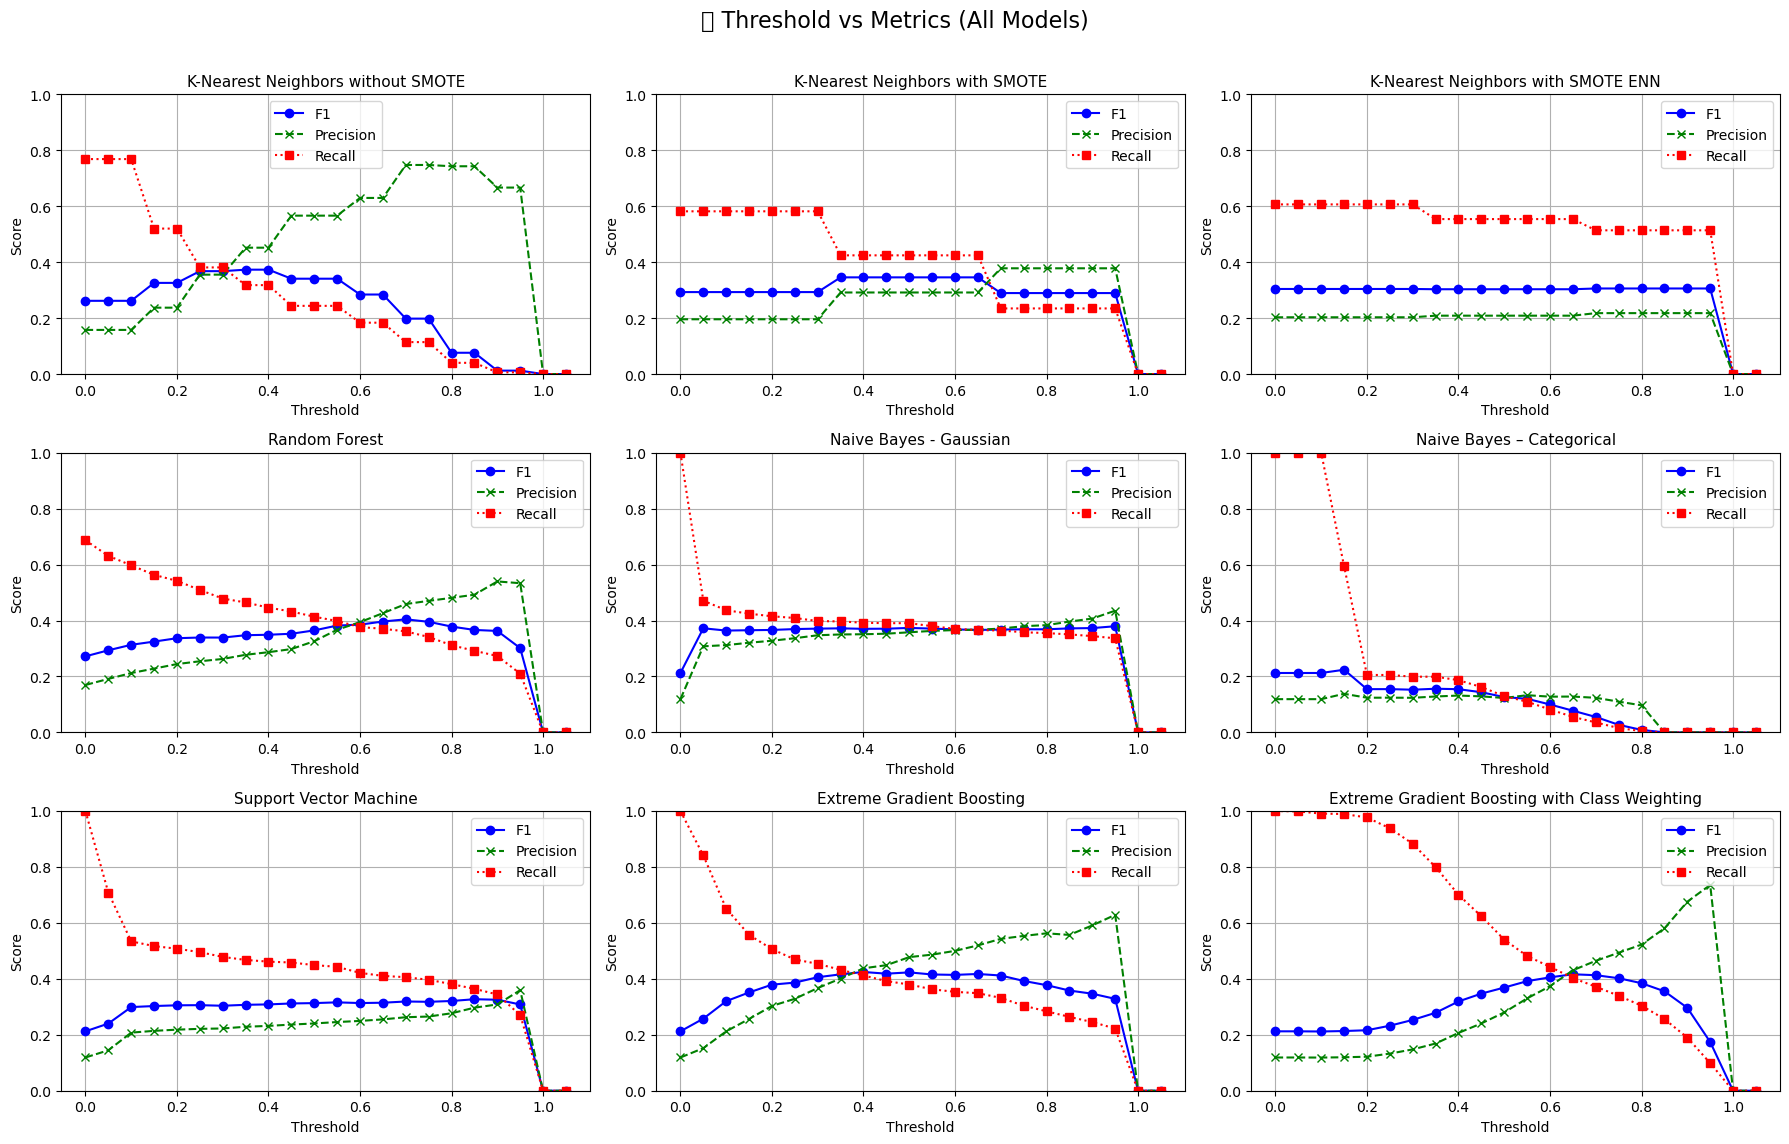

In [420]:
# Visualize threshold vs performance
def plot_all_models_thresholds(models, X_test, y_test, thresholds=np.arange(0.0, 1.1, 0.05)):
    n_models = len(models)
    ncols = 3
    nrows = int(np.ceil(n_models / ncols))

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
    axs = axs.flatten()

    for i, (name, model) in enumerate(models.items()):
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
        except Exception as e:
            print(f"Skipping {name} due to error: {e}")
            continue

        f1s, precisions, recalls = [], [], []

        for threshold in thresholds:
            y_pred = (y_proba > threshold).astype(int)
            f1s.append(f1_score(y_test, y_pred, zero_division=0))
            precisions.append(precision_score(y_test, y_pred, zero_division=0))
            recalls.append(recall_score(y_test, y_pred, zero_division=0))

        ax = axs[i]
        ax.plot(thresholds, f1s, label='F1', color='blue', marker='o')
        ax.plot(thresholds, precisions, label='Precision', color='green', linestyle='--', marker='x')
        ax.plot(thresholds, recalls, label='Recall', color='red', linestyle=':', marker='s')

        ax.set_title(f"{name}", fontsize=11)
        ax.set_xlabel("Threshold")
        ax.set_ylabel("Score")
        ax.set_ylim(0, 1)
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle("📈 Threshold vs Metrics (All Models)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# Run the plotting
plot_all_models_thresholds(models, X_test, y_test)


#### 5.4 Evaluation with Adjusted Thresholds

In [422]:
# Dictionary of best thresholds from tuning
best_thresholds = {
    'K-Nearest Neighbors without SMOTE': 0.35,
    'K-Nearest Neighbors with SMOTE': 0.35,
    'K-Nearest Neighbors with SMOTE ENN': 0.70,
    'Random Forest': 0.70,
    'Naive Bayes - Gaussian': 0.95,
    'Naive Bayes – Categorical': 0.15,
    'Support Vector Machine': 0.85,
    'Extreme Gradient Boosting': 0.40,
    'Extreme Gradient Boosting with Class Weighting': 0.65
}

# To store metrics after applying thresholds
adjusted_metrics = {}

print("### Evaluation with Adjusted Thresholds ###")
for name, model in models.items():
#    print(f"\nAdjusted Evaluation for {name}:\n" + "-" * 50)
    
    # Get probabilities if supported
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        # For SVMs or others that use decision_function
        from sklearn.preprocessing import MinMaxScaler
        decision_scores = model.decision_function(X_test).reshape(-1, 1)
        y_probs = MinMaxScaler().fit_transform(decision_scores).flatten()
    else:
        print("Model doesn't support probability or decision function.")
        continue
    
    # Apply the threshold
    threshold = best_thresholds.get(name, 0.5)
    y_pred_thresh = (y_probs >= threshold).astype(int)

    # Calculate metrics
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_probs)

    # Store metrics
    adjusted_metrics[name] = {
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2),
        'ROC-AUC Score': round(roc_auc, 2)
    }

#    print(f"Threshold Used: {threshold}")
#    print(f"Precision: {precision:.2f}")
#    print(f"Recall: {recall:.2f}")
#    print(f"F1 Score: {f1:.2f}")
#    print(f"ROC-AUC Score: {roc_auc:.2f}")

### Evaluation with Adjusted Thresholds ###


In [424]:
print("\n\n###  Adjusted Threshold Results Summary ###\n")
summary_df = pd.DataFrame.from_dict(adjusted_metrics, orient='index')
summary_df = summary_df[['Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']]
print(summary_df.sort_values(by='F1 Score', ascending=False))



###  Adjusted Threshold Results Summary ###

                                                Precision  Recall  F1 Score  \
Extreme Gradient Boosting                            0.44    0.41      0.42   
Extreme Gradient Boosting with Class Weighting       0.43    0.40      0.42   
Random Forest                                        0.45    0.36      0.40   
Naive Bayes - Gaussian                               0.44    0.34      0.38   
K-Nearest Neighbors without SMOTE                    0.45    0.32      0.37   
K-Nearest Neighbors with SMOTE                       0.29    0.42      0.35   
Support Vector Machine                               0.30    0.36      0.33   
K-Nearest Neighbors with SMOTE ENN                   0.22    0.51      0.31   
Naive Bayes – Categorical                            0.14    0.59      0.22   

                                                ROC-AUC Score  
Extreme Gradient Boosting                                0.73  
Extreme Gradient Boosting with Cla

<Figure size 1400x600 with 0 Axes>

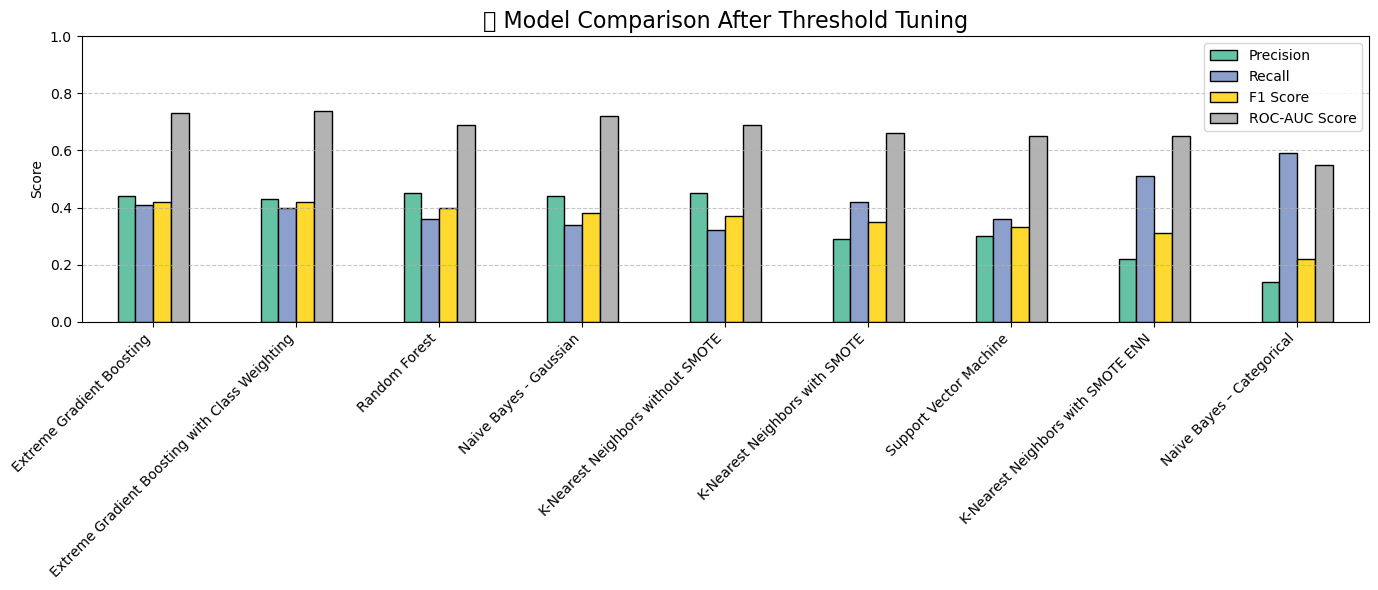

In [426]:
# Convert to DataFrame for plotting
metric_df = pd.DataFrame.from_dict(adjusted_metrics, orient='index')
metric_df = metric_df[['Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']]
metric_df = metric_df.sort_values(by='F1 Score', ascending=False)

# Plot setup
plt.figure(figsize=(14, 6))
metric_df.plot(kind='bar', figsize=(14, 6), colormap='Set2', edgecolor='black')
plt.title('📊 Model Comparison After Threshold Tuning', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

Considering the balance between precision, recall, F1-score, and ROC-AUC, **XGBoost** is selected as the best-performing model for this dataset. It offers a robust solution for imbalanced datasets, achieving a good trade-off between false positives and false negatives. Moreover, its ability to improve iteratively and provide insight into feature importance makes it an excellent choice for our objectives.

While Random Forest had decent performance, especially in precision, its ROC-AUC score was lower, and the recall performance was not as strong as XGBoost. Given the nature of the problem and the metrics that matter most, XGBoost provides the best overall performance.

## 6. Preprocessing the Query Data and Making Predictions

Before using the trained model to make predictions on the query dataset, it is crucial to preprocess the data in the same way as the training set. This involves encoding categorical variables, ensuring that all columns align with those of the training data, and handling any missing values consistently. 

The same transformations used for the training data, such as one-hot encoding and label encoding, should be applied to the query dataset. Additionally, if any scaling or normalization was applied to the training data, the same transformations must be applied to the query data. 

Once preprocessing is complete, the query data can be passed through the trained model to make predictions, allowing us to predict the target values (y) for the entries in the query dataset.

### 6.1 Preprocessing

In [453]:
#query_df.head()

In [455]:
#query_df.info()

In [158]:
query_df = query_df.rename(columns={' campaign': 'campaign'})

In [160]:
# Select the relevant features from the query dataset
query_df_selected = query_df[['balance', 'age', 'day', 'month', 'job', 'pdays', 'poutcome', 
                              'campaign', 'education', 'housing', 'marital']]

## Apply the previously fitted preprocessor to the query data
query_encoded = preprocessor.transform(query_df_selected)  # ONLY transform, NO fitting!

encoded_columns = preprocessor.get_feature_names_out()  # Get the feature names from the same preprocessor

query_encoded_df = pd.DataFrame(query_encoded, columns=encoded_columns)  # Convert to DataFrame

query_numerical = query_df[['age', 'balance', 'day', 'campaign', 'pdays']]  # Select numerical features (no change)

# Concatenate encoded + numerical
query_final = pd.concat([query_numerical.reset_index(drop=True), query_encoded_df.reset_index(drop=True)], axis=1)


In [162]:
# Scale the numerical features in the query dataset (using the same scaler from training set)
query_scaled = scaler.transform(query_final)  # Only transform the query data

# Convert the scaled features back to DataFrame with the same column names
query_scaled_df = pd.DataFrame(query_scaled, columns=query_final.columns)


In [164]:
# List of selected features (same used during training and testing)
selected_features = [
    'age', 'balance', 'day', 'campaign', 'pdays',
    'nominal__job_JobCat11', 'nominal__job_JobCat2', 'nominal__job_JobCat3',
    'nominal__job_JobCat4', 'nominal__job_JobCat6', 'nominal__job_JobCat7', 'nominal__job_JobCat9',
    'nominal__poutcome_failure', 'nominal__poutcome_other', 'nominal__poutcome_success', 'nominal__poutcome_unknown',
    'nominal__marital_divorced', 'nominal__marital_married', 'nominal__marital_single',
    'nominal__housing_no', 'nominal__housing_yes',
    'nominal__month_apr', 'nominal__month_aug', 'nominal__month_feb', 'nominal__month_jul',
    'nominal__month_jun', 'nominal__month_mar', 'nominal__month_may', 'nominal__month_nov',
    'nominal__month_oct', 'ordinal__education'
]

# Select only the relevant features from the scaled query data
query_selected_final = query_scaled_df[selected_features]

### 6.2 Making predictions

In [171]:
# Predict probabilities
query_probs = xgb_model.predict_proba(query_selected_final)[:, 1]

# Apply the selected threshold for XGBoost
optimal_threshold = 0.40
query_predictions_binary = (query_probs >= optimal_threshold).astype(int)

# Map 0 -> 'TypeA', 1 -> 'TypeB' based on the  project assumption
query_predictions_labels = ['TypeA' if pred == 0 else 'TypeB' for pred in query_predictions_binary]

# Create query numbers
query_numbers = range(1, len(query_predictions_labels) + 1)

# Create DataFrame
output_df = pd.DataFrame({
    'query': query_numbers,
    'prediction': query_predictions_labels
})


In [ ]:
# Save to file
student_number = 'D01010101'
output_filename = f'{student_number}.txt'

# Save the file without header and index
output_df.to_csv(output_filename, index=False, header=False)


In [185]:
output_check = pd.read_csv(output_filename, header=None, names=['query', 'prediction'])

# Check the number of queries
print(f"Number of queries: {output_check.shape[0]}")

# Check how many 'TypeA' and 'TypeB' predictions
prediction_counts = output_check['prediction'].value_counts()

print("TypeA/TypeB ratio:", (output_check['prediction'].value_counts(normalize=True)))

# Preview first few rows
print("\nSample predictions:")
print(output_check.head())




Number of queries: 17939
TypeA/TypeB ratio: prediction
TypeA    0.862534
TypeB    0.137466
Name: proportion, dtype: float64

Sample predictions:
   query prediction
0      1      TypeA
1      2      TypeA
2      3      TypeA
3      4      TypeA
4      5      TypeA


Class Distribution in Predictions:
TypeA: 15473 (86.25%)
TypeB: 2466 (13.75%)


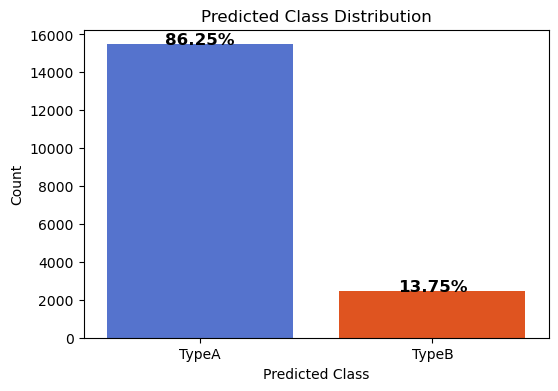

In [187]:
# Count the predictions
class_counts = Counter(query_predictions_labels)
total_samples = sum(class_counts.values())

# Calculate percentages
class_percentages = {label: (count / total_samples) * 100 for label, count in class_counts.items()}

# Print distribution
print("Class Distribution in Predictions:")
for label, count in class_counts.items():
    percentage = class_percentages[label]
    print(f"{label}: {count} ({percentage:.2f}%)")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=["royalblue", "orangered"])

for i, (label, count) in enumerate(class_counts.items()):
    plt.text(i, count + 1, f"{class_percentages[label]:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Predicted Class Distribution")
plt.show()

When analyzing the class distribution, we observe that in the training dataset before dropping records, the proportion was:

- TypeA: 73.58%
- TypeB: 9.93%

After cleaning and removing missing values, the class balance improved to:

- TypeA: 88.11%
- TypeB: 11.89%.

In the query dataset, we observe a similar pattern, where:

- TypeA accounts for approximately 86.25%,
- TypeB accounts for approximately 13.75%.

These distributions are relatively consistent, indicating that the query set reflects the class imbalance seen in the training data after cleaning.
This makes sense, as both datasets likely come from the same source and follow similar patterns, allowing the model to generalize well from training to query predictions.